In [1]:
k = 2

In [2]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import random

import sys
sys.path.append("..")
from sklearn.preprocessing import *
from sklearn.preprocessing import MinMaxScaler
import dataset, network_3D11, WGAN_Model11

# Load data

In [3]:
# Preprocessing
vars = np.zeros((6,864))
j = 0
for i in range(6):
    for i2 in range(4):
        for i3 in range(3):
            for i4 in range(2):
                for i5 in range(3):
                    for i6 in range(2):
                        vars[0,j]=i+2
                        vars[1,j]=i2
                        vars[2,j]=i3
                        vars[3,j]=i4
                        vars[4,j]=i5
                        vars[5,j]=i6
                        j = j +1
j=0
print(vars[:,j])

scenario= "helix" #sinus, helix
n_instance = 1000
n_features = 3
n_var =int(vars[0,j])
latent_space =1000 #3,6,12
batchs = [10,100,1000]
BATCH_SIZE = 100 #100, 32
scales = ['-1-1','0-1']
scaled = '-1-1'
epochs = 50000 #1000, 500
bias = [True,False]
use_bias = False

[2. 0. 0. 0. 0. 0.]


X_train= x,y (1000, 2)
y_train= z (1000, 1)


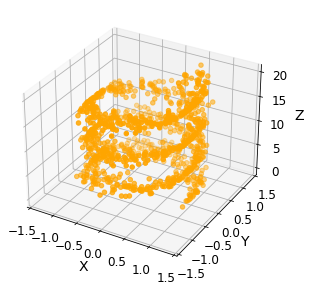

In [4]:
if scenario in ("3d", "helix"):
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    print("X_train= x,y",X_train.shape)
    print("y_train= z",y_train.shape)

    ax = plt.subplot(projection='3d')
    plt.xlim([-1.5,1.5])
    plt.ylim([-1.5,1.5])
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='orange')
    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    plt.tight_layout()

    
else:
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    plt.scatter(X_train,y_train, c='orange', label='Sample Data')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()

In [5]:
os.system('mkdir Dataset')
os.system('mkdir GANS')
os.system('mkdir GANS/Models')
os.system('mkdir GANS/Losses')
os.system('mkdir GANS/Random_test')
#export_excel(X_train, 'Dataset/X_train')
#export_excel(y_train, 'Dataset/y_train')

# print(X_train.shape,y_train.shape)
X_train = import_excel('Dataset/X_train')
y_train = import_excel('Dataset/y_train')

print('made dataset')
    
    

made dataset


# WGAN

### Architecture

In [6]:
generator=network_3D11.build_generator(latent_space, n_var, n_features,use_bias)
generator.summary()

discriminator=network_3D11.build_critic(n_var, use_bias, n_features)
discriminator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                30000     
_________________________________________________________________
batch_normalization (BatchNo (None, 30)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
batch_normalization_1 (Batch (None, 10)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
batch_normalization_2 (Batch (None, 10)                40        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 3

In [7]:
wgan = WGAN_Model11.WGAN(k, n_features,latent_space,BATCH_SIZE,n_var,use_bias)
wgan.wgan.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 3)                 30650     
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 2561      
Total params: 33,211
Trainable params: 33,111
Non-trainable params: 100
_________________________________________________________________


### Preprocessing

In [8]:
train_dataset, scaler, X_train_scaled = wgan.preproc(X_train, y_train, scaled)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_train_scaled",X_train_scaled.shape)

data shape_1 (100, 3)
data shape_2 (100, 3)
data shape_3 (100, 3)
data shape_4 (100, 3)
data shape_5 (100, 3)
data shape_6 (100, 3)
data shape_7 (100, 3)
data shape_8 (100, 3)
data shape_9 (100, 3)
data shape_10 (100, 3)
Cycles:  10
X_train (1000, 2)
y_train (1000, 1)
X_train_scaled (1000, 3)


In [9]:
for data in train_dataset:
    print('train_dataset',data.shape)


train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)


## Training

In [ ]:
hist = wgan.train(train_dataset, epochs, scaler, scaled, X_train, y_train)

Epoch 1/50000
critic: 7.855940 - generator: -0.016771 - 3s
Epoch 2/50000
critic: 0.541341 - generator: 0.010009 - 0s
Epoch 3/50000
critic: 0.016375 - generator: 0.021366 - 0s
Epoch 4/50000
critic: 0.010386 - generator: 0.036706 - 0s
Epoch 5/50000
critic: 0.005850 - generator: 0.048749 - 0s
Epoch 6/50000
critic: 0.006438 - generator: 0.057734 - 0s
Epoch 7/50000
critic: 0.007497 - generator: 0.062995 - 0s
Epoch 8/50000
critic: 0.012241 - generator: 0.072325 - 0s
Epoch 9/50000
critic: 0.003052 - generator: 0.074412 - 0s
Epoch 10/50000
critic: 0.001100 - generator: 0.074905 - 0s
Epoch 11/50000
critic: -0.000251 - generator: 0.075068 - 0s
Epoch 12/50000
critic: 0.001677 - generator: 0.074754 - 0s
Epoch 13/50000
critic: -0.005994 - generator: 0.070745 - 0s
Epoch 14/50000
critic: -0.004432 - generator: 0.063119 - 0s
Epoch 15/50000
critic: -0.002047 - generator: 0.054193 - 0s
Epoch 16/50000
critic: -0.011183 - generator: 0.049563 - 0s
Epoch 17/50000
critic: -0.003219 - generator: 0.047752 - 0s

critic: -0.007906 - generator: 0.052156 - 0s
Epoch 138/50000
critic: -0.009192 - generator: 0.056223 - 0s
Epoch 139/50000
critic: -0.007340 - generator: 0.054316 - 0s
Epoch 140/50000
critic: -0.008624 - generator: 0.056965 - 0s
Epoch 141/50000
critic: -0.007833 - generator: 0.055145 - 0s
Epoch 142/50000
critic: -0.007100 - generator: 0.057260 - 0s
Epoch 143/50000
critic: -0.008155 - generator: 0.054610 - 0s
Epoch 144/50000
critic: -0.008801 - generator: 0.058348 - 0s
Epoch 145/50000
critic: -0.009087 - generator: 0.059863 - 0s
Epoch 146/50000
critic: -0.008835 - generator: 0.056979 - 0s
Epoch 147/50000
critic: -0.008697 - generator: 0.058728 - 0s
Epoch 148/50000
critic: -0.007498 - generator: 0.058789 - 0s
Epoch 149/50000
critic: -0.007251 - generator: 0.057886 - 0s
Epoch 150/50000
critic: -0.009325 - generator: 0.058352 - 0s
Epoch 151/50000
critic: -0.007342 - generator: 0.059483 - 0s
Epoch 152/50000
critic: -0.008227 - generator: 0.057406 - 0s
Epoch 153/50000
critic: -0.007872 - gene

critic: -0.006967 - generator: 0.024801 - 0s
Epoch 273/50000
critic: -0.007080 - generator: 0.023184 - 0s
Epoch 274/50000
critic: -0.007667 - generator: 0.024652 - 0s
Epoch 275/50000
critic: -0.007608 - generator: 0.025552 - 0s
Epoch 276/50000
critic: -0.007885 - generator: 0.025500 - 0s
Epoch 277/50000
critic: -0.005766 - generator: 0.022372 - 0s
Epoch 278/50000
critic: -0.007704 - generator: 0.025289 - 0s
Epoch 279/50000
critic: -0.006272 - generator: 0.022041 - 0s
Epoch 280/50000
critic: -0.005082 - generator: 0.021584 - 0s
Epoch 281/50000
critic: -0.007160 - generator: 0.021593 - 0s
Epoch 282/50000
critic: -0.007502 - generator: 0.019499 - 0s
Epoch 283/50000
critic: -0.007565 - generator: 0.017220 - 0s
Epoch 284/50000
critic: -0.009522 - generator: 0.018074 - 0s
Epoch 285/50000
critic: -0.007225 - generator: 0.018499 - 0s
Epoch 286/50000
critic: -0.008903 - generator: 0.020142 - 0s
Epoch 287/50000
critic: -0.008474 - generator: 0.020571 - 0s
Epoch 288/50000
critic: -0.008710 - gene

critic: -0.006285 - generator: -0.011823 - 0s
Epoch 407/50000
critic: -0.005143 - generator: -0.011740 - 0s
Epoch 408/50000
critic: -0.006787 - generator: -0.011484 - 0s
Epoch 409/50000
critic: -0.007936 - generator: -0.014322 - 0s
Epoch 410/50000
critic: -0.007251 - generator: -0.013566 - 0s
Epoch 411/50000
critic: -0.006664 - generator: -0.016191 - 0s
Epoch 412/50000
critic: -0.005830 - generator: -0.014326 - 0s
Epoch 413/50000
critic: -0.006634 - generator: -0.014864 - 0s
Epoch 414/50000
critic: -0.007341 - generator: -0.018503 - 0s
Epoch 415/50000
critic: -0.005867 - generator: -0.019786 - 0s
Epoch 416/50000
critic: -0.008231 - generator: -0.020710 - 0s
Epoch 417/50000
critic: -0.007998 - generator: -0.020160 - 0s
Epoch 418/50000
critic: -0.007379 - generator: -0.019990 - 0s
Epoch 419/50000
critic: -0.003713 - generator: -0.021479 - 0s
Epoch 420/50000
critic: -0.006584 - generator: -0.022770 - 0s
Epoch 421/50000
critic: -0.007324 - generator: -0.022965 - 0s
Epoch 422/50000
critic: 

critic: -0.003880 - generator: -0.026761 - 0s
Epoch 540/50000
critic: -0.007588 - generator: -0.026055 - 0s
Epoch 541/50000
critic: -0.007636 - generator: -0.024833 - 0s
Epoch 542/50000
critic: -0.006145 - generator: -0.025907 - 0s
Epoch 543/50000
critic: -0.003673 - generator: -0.022388 - 0s
Epoch 544/50000
critic: -0.006562 - generator: -0.022972 - 0s
Epoch 545/50000
critic: -0.007265 - generator: -0.023190 - 0s
Epoch 546/50000
critic: -0.005781 - generator: -0.027160 - 0s
Epoch 547/50000
critic: -0.007848 - generator: -0.022940 - 0s
Epoch 548/50000
critic: -0.007921 - generator: -0.024887 - 0s
Epoch 549/50000
critic: -0.006058 - generator: -0.026845 - 0s
Epoch 550/50000
critic: -0.007830 - generator: -0.025607 - 0s
Epoch 551/50000
critic: -0.006535 - generator: -0.024519 - 0s
Epoch 552/50000
critic: -0.007309 - generator: -0.022728 - 0s
Epoch 553/50000
critic: -0.005931 - generator: -0.024319 - 0s
Epoch 554/50000
critic: -0.006277 - generator: -0.023810 - 0s
Epoch 555/50000
critic: 

critic: -0.004619 - generator: -0.011995 - 0s
Epoch 673/50000
critic: -0.005246 - generator: -0.011160 - 0s
Epoch 674/50000
critic: -0.006620 - generator: -0.010225 - 0s
Epoch 675/50000
critic: -0.008283 - generator: -0.009389 - 0s
Epoch 676/50000
critic: -0.005747 - generator: -0.010411 - 0s
Epoch 677/50000
critic: -0.007851 - generator: -0.012171 - 0s
Epoch 678/50000
critic: -0.008222 - generator: -0.014515 - 0s
Epoch 679/50000
critic: -0.004876 - generator: -0.012751 - 0s
Epoch 680/50000
critic: -0.005595 - generator: -0.013603 - 0s
Epoch 681/50000
critic: -0.008449 - generator: -0.010996 - 0s
Epoch 682/50000
critic: -0.007305 - generator: -0.010782 - 0s
Epoch 683/50000
critic: -0.007539 - generator: -0.010584 - 0s
Epoch 684/50000
critic: -0.006304 - generator: -0.009572 - 0s
Epoch 685/50000
critic: -0.006681 - generator: -0.008923 - 0s
Epoch 686/50000
critic: -0.007213 - generator: -0.008681 - 0s
Epoch 687/50000
critic: -0.007226 - generator: -0.010494 - 0s
Epoch 688/50000
critic: 

critic: -0.004458 - generator: -0.005499 - 0s
Epoch 806/50000
critic: -0.003956 - generator: -0.006471 - 0s
Epoch 807/50000
critic: -0.007916 - generator: -0.005602 - 0s
Epoch 808/50000
critic: -0.004455 - generator: -0.009048 - 0s
Epoch 809/50000
critic: -0.008049 - generator: -0.005601 - 0s
Epoch 810/50000
critic: -0.006655 - generator: -0.004904 - 0s
Epoch 811/50000
critic: -0.007836 - generator: -0.006039 - 0s
Epoch 812/50000
critic: -0.006718 - generator: -0.005250 - 0s
Epoch 813/50000
critic: -0.005688 - generator: -0.005268 - 0s
Epoch 814/50000
critic: -0.005893 - generator: -0.002824 - 0s
Epoch 815/50000
critic: -0.005802 - generator: -0.004847 - 0s
Epoch 816/50000
critic: -0.006526 - generator: -0.005117 - 0s
Epoch 817/50000
critic: -0.006591 - generator: -0.001669 - 0s
Epoch 818/50000
critic: -0.005585 - generator: -0.004596 - 0s
Epoch 819/50000
critic: -0.004953 - generator: -0.000309 - 0s
Epoch 820/50000
critic: -0.005066 - generator: -0.002154 - 0s
Epoch 821/50000
critic: 

critic: -0.006953 - generator: -0.003144 - 0s
Epoch 939/50000
critic: -0.008254 - generator: -0.001242 - 0s
Epoch 940/50000
critic: -0.007411 - generator: 0.000636 - 0s
Epoch 941/50000
critic: -0.008161 - generator: -0.001396 - 0s
Epoch 942/50000
critic: -0.006896 - generator: -0.002198 - 0s
Epoch 943/50000
critic: -0.006464 - generator: -0.003272 - 0s
Epoch 944/50000
critic: -0.007080 - generator: -0.004188 - 0s
Epoch 945/50000
critic: -0.008682 - generator: -0.005213 - 0s
Epoch 946/50000
critic: -0.005935 - generator: -0.004859 - 0s
Epoch 947/50000
critic: -0.006281 - generator: -0.005997 - 0s
Epoch 948/50000
critic: -0.008087 - generator: -0.002414 - 0s
Epoch 949/50000
critic: -0.007747 - generator: -0.000298 - 0s
Epoch 950/50000
critic: -0.007632 - generator: 0.000415 - 0s
Epoch 951/50000
critic: -0.007724 - generator: -0.001277 - 0s
Epoch 952/50000
critic: -0.005057 - generator: -0.000858 - 0s
Epoch 953/50000
critic: -0.005831 - generator: -0.002682 - 0s
Epoch 954/50000
critic: -0

critic: -0.007736 - generator: 0.005840 - 0s
Epoch 1072/50000
critic: -0.007006 - generator: 0.005490 - 0s
Epoch 1073/50000
critic: -0.008207 - generator: 0.003107 - 0s
Epoch 1074/50000
critic: -0.007848 - generator: 0.002451 - 0s
Epoch 1075/50000
critic: -0.005268 - generator: 0.002693 - 0s
Epoch 1076/50000
critic: -0.007390 - generator: 0.004324 - 0s
Epoch 1077/50000
critic: -0.007565 - generator: 0.005386 - 0s
Epoch 1078/50000
critic: -0.008787 - generator: 0.001722 - 0s
Epoch 1079/50000
critic: -0.007239 - generator: 0.002741 - 0s
Epoch 1080/50000
critic: -0.007353 - generator: 0.002056 - 0s
Epoch 1081/50000
critic: -0.007663 - generator: 0.002718 - 0s
Epoch 1082/50000
critic: -0.007136 - generator: 0.001931 - 0s
Epoch 1083/50000
critic: -0.007299 - generator: 0.003661 - 0s
Epoch 1084/50000
critic: -0.007006 - generator: 0.002577 - 0s
Epoch 1085/50000
critic: -0.008719 - generator: 0.002981 - 0s
Epoch 1086/50000
critic: -0.007248 - generator: 0.001906 - 0s
Epoch 1087/50000
critic: 

critic: -0.006284 - generator: 0.001762 - 0s
Epoch 1205/50000
critic: -0.008518 - generator: 0.003255 - 0s
Epoch 1206/50000
critic: -0.008760 - generator: 0.003713 - 0s
Epoch 1207/50000
critic: -0.005449 - generator: 0.005282 - 0s
Epoch 1208/50000
critic: -0.007666 - generator: 0.004218 - 0s
Epoch 1209/50000
critic: -0.006875 - generator: 0.004254 - 0s
Epoch 1210/50000
critic: -0.006809 - generator: 0.003584 - 0s
Epoch 1211/50000
critic: -0.008981 - generator: 0.003403 - 0s
Epoch 1212/50000
critic: -0.008273 - generator: 0.002349 - 0s
Epoch 1213/50000
critic: -0.007596 - generator: 0.001088 - 0s
Epoch 1214/50000
critic: -0.007411 - generator: 0.001983 - 0s
Epoch 1215/50000
critic: -0.007736 - generator: 0.002970 - 0s
Epoch 1216/50000
critic: -0.007402 - generator: 0.002636 - 0s
Epoch 1217/50000
critic: -0.008489 - generator: 0.001965 - 0s
Epoch 1218/50000
critic: -0.006878 - generator: 0.001513 - 0s
Epoch 1219/50000
critic: -0.007067 - generator: 0.001822 - 0s
Epoch 1220/50000
critic: 

critic: -0.007537 - generator: 0.002554 - 0s
Epoch 1338/50000
critic: -0.007646 - generator: 0.002624 - 0s
Epoch 1339/50000
critic: -0.007713 - generator: 0.002903 - 0s
Epoch 1340/50000
critic: -0.008273 - generator: 0.002799 - 0s
Epoch 1341/50000
critic: -0.006002 - generator: 0.004571 - 0s
Epoch 1342/50000
critic: -0.006569 - generator: 0.003761 - 0s
Epoch 1343/50000
critic: -0.007858 - generator: 0.003833 - 0s
Epoch 1344/50000
critic: -0.006198 - generator: 0.004048 - 0s
Epoch 1345/50000
critic: -0.008059 - generator: 0.003507 - 0s
Epoch 1346/50000
critic: -0.006668 - generator: 0.003296 - 0s
Epoch 1347/50000
critic: -0.006093 - generator: 0.005332 - 0s
Epoch 1348/50000
critic: -0.006815 - generator: 0.001834 - 0s
Epoch 1349/50000
critic: -0.005540 - generator: 0.000410 - 0s
Epoch 1350/50000
critic: -0.007314 - generator: 0.001561 - 0s
Epoch 1351/50000
critic: -0.006669 - generator: -0.000001 - 0s
Epoch 1352/50000
critic: -0.008043 - generator: 0.001202 - 0s
Epoch 1353/50000
critic:

critic: -0.006815 - generator: 0.001595 - 0s
Epoch 1471/50000
critic: -0.006421 - generator: 0.002655 - 0s
Epoch 1472/50000
critic: -0.006007 - generator: 0.002324 - 0s
Epoch 1473/50000
critic: -0.007479 - generator: 0.003851 - 0s
Epoch 1474/50000
critic: -0.007264 - generator: 0.002045 - 0s
Epoch 1475/50000
critic: -0.006113 - generator: 0.000931 - 0s
Epoch 1476/50000
critic: -0.004200 - generator: 0.002092 - 0s
Epoch 1477/50000
critic: -0.006816 - generator: 0.003872 - 0s
Epoch 1478/50000
critic: -0.006888 - generator: 0.002400 - 0s
Epoch 1479/50000
critic: -0.006012 - generator: 0.002559 - 0s
Epoch 1480/50000
critic: -0.006669 - generator: 0.000827 - 0s
Epoch 1481/50000
critic: -0.008036 - generator: 0.000472 - 0s
Epoch 1482/50000
critic: -0.006414 - generator: 0.002012 - 0s
Epoch 1483/50000
critic: -0.007553 - generator: 0.003217 - 0s
Epoch 1484/50000
critic: -0.006209 - generator: 0.003703 - 0s
Epoch 1485/50000
critic: -0.004639 - generator: 0.003266 - 0s
Epoch 1486/50000
critic: 

critic: -0.008026 - generator: 0.000712 - 0s
Epoch 1603/50000
critic: -0.005233 - generator: -0.000220 - 0s
Epoch 1604/50000
critic: -0.007124 - generator: 0.001148 - 0s
Epoch 1605/50000
critic: -0.007609 - generator: 0.001580 - 0s
Epoch 1606/50000
critic: -0.005808 - generator: -0.000717 - 0s
Epoch 1607/50000
critic: -0.008729 - generator: 0.000046 - 0s
Epoch 1608/50000
critic: -0.006885 - generator: 0.000071 - 0s
Epoch 1609/50000
critic: -0.008248 - generator: 0.001497 - 0s
Epoch 1610/50000
critic: -0.003453 - generator: 0.000857 - 0s
Epoch 1611/50000
critic: -0.008279 - generator: 0.000934 - 0s
Epoch 1612/50000
critic: -0.007431 - generator: 0.001103 - 0s
Epoch 1613/50000
critic: -0.005528 - generator: 0.000618 - 0s
Epoch 1614/50000
critic: -0.007629 - generator: 0.001177 - 0s
Epoch 1615/50000
critic: -0.006265 - generator: 0.001300 - 0s
Epoch 1616/50000
critic: -0.007856 - generator: 0.002989 - 0s
Epoch 1617/50000
critic: -0.005437 - generator: 0.000015 - 0s
Epoch 1618/50000
critic

critic: -0.005018 - generator: -0.002785 - 0s
Epoch 1734/50000
critic: -0.007312 - generator: -0.001075 - 0s
Epoch 1735/50000
critic: -0.007713 - generator: 0.000238 - 0s
Epoch 1736/50000
critic: -0.007509 - generator: 0.000037 - 0s
Epoch 1737/50000
critic: -0.007099 - generator: -0.002007 - 0s
Epoch 1738/50000
critic: -0.007533 - generator: -0.000148 - 0s
Epoch 1739/50000
critic: -0.007144 - generator: -0.001356 - 0s
Epoch 1740/50000
critic: -0.006788 - generator: -0.000577 - 0s
Epoch 1741/50000
critic: -0.008700 - generator: -0.000412 - 0s
Epoch 1742/50000
critic: -0.007242 - generator: -0.003938 - 0s
Epoch 1743/50000
critic: -0.006877 - generator: -0.004434 - 0s
Epoch 1744/50000
critic: -0.007850 - generator: -0.001832 - 0s
Epoch 1745/50000
critic: -0.007705 - generator: -0.002310 - 0s
Epoch 1746/50000
critic: -0.008491 - generator: -0.002815 - 0s
Epoch 1747/50000
critic: -0.005232 - generator: -0.002718 - 0s
Epoch 1748/50000
critic: -0.006083 - generator: -0.003102 - 0s
Epoch 1749/

critic: -0.006002 - generator: -0.007014 - 0s
Epoch 1865/50000
critic: -0.005983 - generator: -0.005509 - 0s
Epoch 1866/50000
critic: -0.006841 - generator: -0.005876 - 0s
Epoch 1867/50000
critic: -0.007094 - generator: -0.005614 - 0s
Epoch 1868/50000
critic: -0.005579 - generator: -0.005262 - 0s
Epoch 1869/50000
critic: -0.006458 - generator: -0.004572 - 0s
Epoch 1870/50000
critic: -0.007250 - generator: -0.005333 - 0s
Epoch 1871/50000
critic: -0.007049 - generator: -0.007150 - 0s
Epoch 1872/50000
critic: -0.007080 - generator: -0.005887 - 0s
Epoch 1873/50000
critic: -0.006941 - generator: -0.007348 - 0s
Epoch 1874/50000
critic: -0.005220 - generator: -0.006181 - 0s
Epoch 1875/50000
critic: -0.005967 - generator: -0.003555 - 0s
Epoch 1876/50000
critic: -0.006392 - generator: -0.005964 - 0s
Epoch 1877/50000
critic: -0.006497 - generator: -0.007415 - 0s
Epoch 1878/50000
critic: -0.004873 - generator: -0.005457 - 0s
Epoch 1879/50000
critic: -0.007229 - generator: -0.006470 - 0s
Epoch 188

critic: -0.007424 - generator: -0.003332 - 0s
Epoch 1996/50000
critic: -0.007743 - generator: -0.004455 - 0s
Epoch 1997/50000
critic: -0.008575 - generator: -0.004483 - 0s
Epoch 1998/50000
critic: -0.006585 - generator: -0.005036 - 0s
Epoch 1999/50000
critic: -0.006844 - generator: -0.004752 - 0s
Epoch 2000/50000
critic: -0.006928 - generator: -0.004450 - 0s
Epoch 2001/50000
critic: -0.005701 - generator: -0.005007 - 0s
Epoch 2002/50000
critic: -0.007522 - generator: -0.005256 - 0s
Epoch 2003/50000
critic: -0.006092 - generator: -0.003871 - 0s
Epoch 2004/50000
critic: -0.008227 - generator: -0.003473 - 0s
Epoch 2005/50000
critic: -0.007268 - generator: -0.005651 - 0s
Epoch 2006/50000
critic: -0.006772 - generator: -0.007021 - 0s
Epoch 2007/50000
critic: -0.007036 - generator: -0.007126 - 0s
Epoch 2008/50000
critic: -0.007321 - generator: -0.007769 - 0s
Epoch 2009/50000
critic: -0.005654 - generator: -0.009700 - 0s
Epoch 2010/50000
critic: -0.008410 - generator: -0.008270 - 0s
Epoch 201

critic: -0.007612 - generator: -0.004608 - 0s
Epoch 2127/50000
critic: -0.006638 - generator: -0.005122 - 0s
Epoch 2128/50000
critic: -0.006500 - generator: -0.005224 - 0s
Epoch 2129/50000
critic: -0.005796 - generator: -0.005559 - 0s
Epoch 2130/50000
critic: -0.005876 - generator: -0.005693 - 0s
Epoch 2131/50000
critic: -0.008254 - generator: -0.004446 - 0s
Epoch 2132/50000
critic: -0.007186 - generator: -0.004425 - 0s
Epoch 2133/50000
critic: -0.006015 - generator: -0.004155 - 0s
Epoch 2134/50000
critic: -0.007763 - generator: -0.004698 - 0s
Epoch 2135/50000
critic: -0.005882 - generator: -0.006858 - 0s
Epoch 2136/50000
critic: -0.007507 - generator: -0.005514 - 0s
Epoch 2137/50000
critic: -0.005830 - generator: -0.003390 - 0s
Epoch 2138/50000
critic: -0.007054 - generator: -0.002164 - 0s
Epoch 2139/50000
critic: -0.005863 - generator: -0.002462 - 0s
Epoch 2140/50000
critic: -0.006655 - generator: -0.000864 - 0s
Epoch 2141/50000
critic: -0.007598 - generator: -0.003154 - 0s
Epoch 214

critic: -0.005599 - generator: -0.010229 - 0s
Epoch 2258/50000
critic: -0.006877 - generator: -0.007764 - 0s
Epoch 2259/50000
critic: -0.007201 - generator: -0.008855 - 0s
Epoch 2260/50000
critic: -0.007960 - generator: -0.007749 - 0s
Epoch 2261/50000
critic: -0.007496 - generator: -0.008521 - 0s
Epoch 2262/50000
critic: -0.005685 - generator: -0.009954 - 0s
Epoch 2263/50000
critic: -0.006770 - generator: -0.011251 - 0s
Epoch 2264/50000
critic: -0.005599 - generator: -0.010557 - 0s
Epoch 2265/50000
critic: -0.007677 - generator: -0.010000 - 0s
Epoch 2266/50000
critic: -0.005369 - generator: -0.012275 - 0s
Epoch 2267/50000
critic: -0.006916 - generator: -0.012308 - 0s
Epoch 2268/50000
critic: -0.007485 - generator: -0.013590 - 0s
Epoch 2269/50000
critic: -0.005261 - generator: -0.013135 - 0s
Epoch 2270/50000
critic: -0.005981 - generator: -0.010872 - 0s
Epoch 2271/50000
critic: -0.007405 - generator: -0.008355 - 0s
Epoch 2272/50000
critic: -0.007061 - generator: -0.009240 - 0s
Epoch 227

critic: -0.006871 - generator: -0.009098 - 0s
Epoch 2389/50000
critic: -0.006798 - generator: -0.008636 - 0s
Epoch 2390/50000
critic: -0.005882 - generator: -0.010717 - 0s
Epoch 2391/50000
critic: -0.006115 - generator: -0.009534 - 0s
Epoch 2392/50000
critic: -0.006287 - generator: -0.009107 - 0s
Epoch 2393/50000
critic: -0.004667 - generator: -0.011002 - 0s
Epoch 2394/50000
critic: -0.003940 - generator: -0.011314 - 0s
Epoch 2395/50000
critic: -0.006547 - generator: -0.010994 - 0s
Epoch 2396/50000
critic: -0.006079 - generator: -0.010178 - 0s
Epoch 2397/50000
critic: -0.005721 - generator: -0.009984 - 0s
Epoch 2398/50000
critic: -0.006838 - generator: -0.008337 - 0s
Epoch 2399/50000
critic: -0.005661 - generator: -0.011292 - 0s
Epoch 2400/50000
critic: -0.007151 - generator: -0.009991 - 0s
Epoch 2401/50000
critic: -0.005327 - generator: -0.010060 - 0s
Epoch 2402/50000
critic: -0.006540 - generator: -0.010319 - 0s
Epoch 2403/50000
critic: -0.005847 - generator: -0.011014 - 0s
Epoch 240

critic: -0.004838 - generator: -0.012166 - 0s
Epoch 2520/50000
critic: -0.006836 - generator: -0.011172 - 0s
Epoch 2521/50000
critic: -0.003992 - generator: -0.011378 - 0s
Epoch 2522/50000
critic: -0.005286 - generator: -0.012051 - 0s
Epoch 2523/50000
critic: -0.005483 - generator: -0.011966 - 0s
Epoch 2524/50000
critic: -0.006881 - generator: -0.011645 - 0s
Epoch 2525/50000
critic: -0.005396 - generator: -0.012650 - 0s
Epoch 2526/50000
critic: -0.005412 - generator: -0.013422 - 0s
Epoch 2527/50000
critic: -0.007224 - generator: -0.015021 - 0s
Epoch 2528/50000
critic: -0.005592 - generator: -0.013733 - 0s
Epoch 2529/50000
critic: -0.004531 - generator: -0.011424 - 0s
Epoch 2530/50000
critic: -0.003836 - generator: -0.012125 - 0s
Epoch 2531/50000
critic: -0.006602 - generator: -0.012960 - 0s
Epoch 2532/50000
critic: -0.005964 - generator: -0.012396 - 0s
Epoch 2533/50000
critic: -0.005778 - generator: -0.011537 - 0s
Epoch 2534/50000
critic: -0.005745 - generator: -0.010705 - 0s
Epoch 253

critic: -0.005350 - generator: -0.012401 - 0s
Epoch 2651/50000
critic: -0.004402 - generator: -0.010723 - 0s
Epoch 2652/50000
critic: -0.005568 - generator: -0.010588 - 0s
Epoch 2653/50000
critic: -0.005984 - generator: -0.011183 - 0s
Epoch 2654/50000
critic: -0.005676 - generator: -0.010642 - 0s
Epoch 2655/50000
critic: -0.005617 - generator: -0.009872 - 0s
Epoch 2656/50000
critic: -0.003596 - generator: -0.011099 - 0s
Epoch 2657/50000
critic: -0.005858 - generator: -0.009763 - 0s
Epoch 2658/50000
critic: -0.004494 - generator: -0.010267 - 0s
Epoch 2659/50000
critic: -0.006373 - generator: -0.013931 - 0s
Epoch 2660/50000
critic: -0.005497 - generator: -0.012599 - 0s
Epoch 2661/50000
critic: -0.004793 - generator: -0.010256 - 0s
Epoch 2662/50000
critic: -0.004376 - generator: -0.009813 - 0s
Epoch 2663/50000
critic: -0.004748 - generator: -0.008506 - 0s
Epoch 2664/50000
critic: -0.004651 - generator: -0.010481 - 0s
Epoch 2665/50000
critic: -0.005159 - generator: -0.010465 - 0s
Epoch 266

critic: -0.005101 - generator: -0.008597 - 0s
Epoch 2782/50000
critic: -0.004677 - generator: -0.011289 - 0s
Epoch 2783/50000
critic: -0.004043 - generator: -0.010321 - 0s
Epoch 2784/50000
critic: -0.004866 - generator: -0.009649 - 0s
Epoch 2785/50000
critic: -0.003590 - generator: -0.010394 - 0s
Epoch 2786/50000
critic: -0.004503 - generator: -0.010138 - 0s
Epoch 2787/50000
critic: -0.003840 - generator: -0.007918 - 0s
Epoch 2788/50000
critic: -0.005250 - generator: -0.008136 - 0s
Epoch 2789/50000
critic: -0.003507 - generator: -0.008707 - 0s
Epoch 2790/50000
critic: -0.004685 - generator: -0.009908 - 0s
Epoch 2791/50000
critic: -0.005237 - generator: -0.012238 - 0s
Epoch 2792/50000
critic: -0.003210 - generator: -0.008958 - 0s
Epoch 2793/50000
critic: -0.004219 - generator: -0.009641 - 0s
Epoch 2794/50000
critic: -0.006322 - generator: -0.007142 - 0s
Epoch 2795/50000
critic: -0.005452 - generator: -0.008937 - 0s
Epoch 2796/50000
critic: -0.004606 - generator: -0.009785 - 0s
Epoch 279

critic: -0.004304 - generator: -0.006164 - 0s
Epoch 2913/50000
critic: -0.003875 - generator: -0.006449 - 0s
Epoch 2914/50000
critic: -0.004244 - generator: -0.006298 - 0s
Epoch 2915/50000
critic: -0.004916 - generator: -0.005079 - 0s
Epoch 2916/50000
critic: -0.003906 - generator: -0.006874 - 0s
Epoch 2917/50000
critic: -0.004518 - generator: -0.007262 - 0s
Epoch 2918/50000
critic: -0.003623 - generator: -0.006850 - 0s
Epoch 2919/50000
critic: -0.004232 - generator: -0.005506 - 0s
Epoch 2920/50000
critic: -0.003620 - generator: -0.005285 - 0s
Epoch 2921/50000
critic: -0.004053 - generator: -0.006878 - 0s
Epoch 2922/50000
critic: -0.003665 - generator: -0.006584 - 0s
Epoch 2923/50000
critic: -0.003916 - generator: -0.005980 - 0s
Epoch 2924/50000
critic: -0.004284 - generator: -0.006039 - 0s
Epoch 2925/50000
critic: -0.004921 - generator: -0.006544 - 0s
Epoch 2926/50000
critic: -0.004787 - generator: -0.004687 - 0s
Epoch 2927/50000
critic: -0.002740 - generator: -0.003980 - 0s
Epoch 292

critic: -0.004559 - generator: -0.000795 - 0s
Epoch 3044/50000
critic: -0.003301 - generator: -0.001448 - 0s
Epoch 3045/50000
critic: -0.003488 - generator: -0.002196 - 0s
Epoch 3046/50000
critic: -0.004091 - generator: -0.001056 - 0s
Epoch 3047/50000
critic: -0.003762 - generator: -0.002388 - 0s
Epoch 3048/50000
critic: -0.003329 - generator: -0.000992 - 0s
Epoch 3049/50000
critic: -0.002115 - generator: -0.002278 - 0s
Epoch 3050/50000
critic: -0.004900 - generator: -0.000870 - 0s
Epoch 3051/50000
critic: -0.003093 - generator: -0.000835 - 0s
Epoch 3052/50000
critic: -0.004507 - generator: -0.000366 - 0s
Epoch 3053/50000
critic: -0.002900 - generator: -0.000664 - 0s
Epoch 3054/50000
critic: -0.002660 - generator: -0.000541 - 0s
Epoch 3055/50000
critic: -0.003704 - generator: -0.000653 - 0s
Epoch 3056/50000
critic: -0.003417 - generator: 0.000078 - 0s
Epoch 3057/50000
critic: -0.002886 - generator: -0.001916 - 0s
Epoch 3058/50000
critic: -0.003027 - generator: -0.002903 - 0s
Epoch 3059

critic: -0.003334 - generator: -0.001677 - 0s
Epoch 3175/50000
critic: -0.002462 - generator: 0.000147 - 0s
Epoch 3176/50000
critic: -0.004533 - generator: -0.000537 - 0s
Epoch 3177/50000
critic: -0.003905 - generator: -0.001029 - 0s
Epoch 3178/50000
critic: -0.003445 - generator: -0.002266 - 0s
Epoch 3179/50000
critic: -0.004141 - generator: -0.000246 - 0s
Epoch 3180/50000
critic: -0.004243 - generator: 0.000313 - 0s
Epoch 3181/50000
critic: -0.003756 - generator: -0.001890 - 0s
Epoch 3182/50000
critic: -0.003542 - generator: -0.001122 - 0s
Epoch 3183/50000
critic: -0.004053 - generator: -0.002974 - 0s
Epoch 3184/50000
critic: -0.004898 - generator: -0.001142 - 0s
Epoch 3185/50000
critic: -0.002825 - generator: 0.001040 - 0s
Epoch 3186/50000
critic: -0.003933 - generator: -0.001258 - 0s
Epoch 3187/50000
critic: -0.004760 - generator: -0.002750 - 0s
Epoch 3188/50000
critic: -0.004702 - generator: -0.002126 - 0s
Epoch 3189/50000
critic: -0.003687 - generator: -0.001846 - 0s
Epoch 3190/5

critic: -0.003042 - generator: 0.003056 - 0s
Epoch 3307/50000
critic: -0.002427 - generator: 0.003968 - 0s
Epoch 3308/50000
critic: -0.001970 - generator: 0.002883 - 0s
Epoch 3309/50000
critic: -0.003177 - generator: 0.003296 - 0s
Epoch 3310/50000
critic: -0.002952 - generator: 0.001606 - 0s
Epoch 3311/50000
critic: -0.002624 - generator: 0.003397 - 0s
Epoch 3312/50000
critic: -0.004052 - generator: 0.002210 - 0s
Epoch 3313/50000
critic: -0.002259 - generator: 0.001482 - 0s
Epoch 3314/50000
critic: -0.002766 - generator: 0.004359 - 0s
Epoch 3315/50000
critic: -0.003793 - generator: 0.003889 - 0s
Epoch 3316/50000
critic: -0.003039 - generator: 0.003699 - 0s
Epoch 3317/50000
critic: -0.001749 - generator: 0.004182 - 0s
Epoch 3318/50000
critic: -0.003420 - generator: 0.004610 - 0s
Epoch 3319/50000
critic: -0.003409 - generator: 0.003792 - 0s
Epoch 3320/50000
critic: -0.001040 - generator: 0.002495 - 0s
Epoch 3321/50000
critic: -0.002811 - generator: 0.004281 - 0s
Epoch 3322/50000
critic: 

critic: -0.002823 - generator: 0.003565 - 0s
Epoch 3440/50000
critic: -0.002114 - generator: 0.005029 - 0s
Epoch 3441/50000
critic: -0.001341 - generator: 0.002974 - 0s
Epoch 3442/50000
critic: -0.002968 - generator: 0.003690 - 0s
Epoch 3443/50000
critic: -0.002927 - generator: 0.003773 - 0s
Epoch 3444/50000
critic: -0.002622 - generator: 0.004969 - 0s
Epoch 3445/50000
critic: -0.003137 - generator: 0.006196 - 0s
Epoch 3446/50000
critic: -0.002894 - generator: 0.005659 - 0s
Epoch 3447/50000
critic: -0.003469 - generator: 0.005606 - 0s
Epoch 3448/50000
critic: -0.002102 - generator: 0.004764 - 0s
Epoch 3449/50000
critic: -0.003560 - generator: 0.006903 - 0s
Epoch 3450/50000
critic: -0.003158 - generator: 0.006804 - 0s
Epoch 3451/50000
critic: -0.004243 - generator: 0.007353 - 0s
Epoch 3452/50000
critic: -0.001321 - generator: 0.006281 - 0s
Epoch 3453/50000
critic: -0.003414 - generator: 0.007509 - 0s
Epoch 3454/50000
critic: -0.003000 - generator: 0.005965 - 0s
Epoch 3455/50000
critic: 

critic: -0.002255 - generator: 0.007383 - 0s
Epoch 3573/50000
critic: -0.003630 - generator: 0.007029 - 0s
Epoch 3574/50000
critic: -0.000795 - generator: 0.005171 - 0s
Epoch 3575/50000
critic: -0.002536 - generator: 0.006481 - 0s
Epoch 3576/50000
critic: -0.003006 - generator: 0.006058 - 0s
Epoch 3577/50000
critic: -0.003381 - generator: 0.008627 - 0s
Epoch 3578/50000
critic: -0.003095 - generator: 0.007706 - 0s
Epoch 3579/50000
critic: -0.003542 - generator: 0.008500 - 0s
Epoch 3580/50000
critic: -0.002908 - generator: 0.008634 - 0s
Epoch 3581/50000
critic: -0.002645 - generator: 0.007767 - 0s
Epoch 3582/50000
critic: -0.004075 - generator: 0.007539 - 0s
Epoch 3583/50000
critic: -0.002267 - generator: 0.008598 - 0s
Epoch 3584/50000
critic: -0.001346 - generator: 0.008280 - 0s
Epoch 3585/50000
critic: -0.001954 - generator: 0.005290 - 0s
Epoch 3586/50000
critic: -0.003483 - generator: 0.007732 - 0s
Epoch 3587/50000
critic: -0.002750 - generator: 0.006841 - 0s
Epoch 3588/50000
critic: 

critic: -0.003505 - generator: 0.004751 - 0s
Epoch 3706/50000
critic: -0.002313 - generator: 0.004446 - 0s
Epoch 3707/50000
critic: -0.001897 - generator: 0.005454 - 0s
Epoch 3708/50000
critic: -0.003846 - generator: 0.004904 - 0s
Epoch 3709/50000
critic: -0.000537 - generator: 0.005114 - 0s
Epoch 3710/50000
critic: -0.002372 - generator: 0.003870 - 0s
Epoch 3711/50000
critic: -0.003336 - generator: 0.002825 - 0s
Epoch 3712/50000
critic: -0.001601 - generator: 0.004926 - 0s
Epoch 3713/50000
critic: -0.002611 - generator: 0.004166 - 0s
Epoch 3714/50000
critic: -0.001964 - generator: 0.003135 - 0s
Epoch 3715/50000
critic: -0.003245 - generator: 0.002582 - 0s
Epoch 3716/50000
critic: -0.003069 - generator: 0.001685 - 0s
Epoch 3717/50000
critic: -0.003634 - generator: 0.001130 - 0s
Epoch 3718/50000
critic: -0.001508 - generator: 0.004333 - 0s
Epoch 3719/50000
critic: -0.002898 - generator: 0.004893 - 0s
Epoch 3720/50000
critic: -0.003033 - generator: 0.004862 - 0s
Epoch 3721/50000
critic: 

critic: -0.003038 - generator: 0.001327 - 0s
Epoch 3839/50000
critic: -0.003309 - generator: 0.002381 - 0s
Epoch 3840/50000
critic: -0.002331 - generator: 0.001300 - 0s
Epoch 3841/50000
critic: -0.003119 - generator: -0.000541 - 0s
Epoch 3842/50000
critic: -0.002260 - generator: 0.001415 - 0s
Epoch 3843/50000
critic: -0.001750 - generator: 0.000978 - 0s
Epoch 3844/50000
critic: -0.001920 - generator: 0.003723 - 0s
Epoch 3845/50000
critic: -0.002801 - generator: 0.004563 - 0s
Epoch 3846/50000
critic: -0.002594 - generator: 0.005298 - 0s
Epoch 3847/50000
critic: -0.001235 - generator: 0.004806 - 0s
Epoch 3848/50000
critic: -0.001544 - generator: 0.005238 - 0s
Epoch 3849/50000
critic: -0.002922 - generator: 0.004491 - 0s
Epoch 3850/50000
critic: -0.003267 - generator: 0.002967 - 0s
Epoch 3851/50000
critic: -0.002121 - generator: 0.001213 - 0s
Epoch 3852/50000
critic: -0.001549 - generator: 0.003448 - 0s
Epoch 3853/50000
critic: -0.002104 - generator: 0.004220 - 0s
Epoch 3854/50000
critic:

critic: -0.002157 - generator: 0.004182 - 0s
Epoch 3972/50000
critic: -0.002239 - generator: 0.003425 - 0s
Epoch 3973/50000
critic: -0.002049 - generator: 0.002810 - 0s
Epoch 3974/50000
critic: -0.002073 - generator: 0.003028 - 0s
Epoch 3975/50000
critic: -0.002107 - generator: 0.004002 - 0s
Epoch 3976/50000
critic: -0.003018 - generator: 0.005583 - 0s
Epoch 3977/50000
critic: -0.002430 - generator: 0.003462 - 0s
Epoch 3978/50000
critic: -0.002624 - generator: 0.002285 - 0s
Epoch 3979/50000
critic: -0.002891 - generator: 0.005185 - 0s
Epoch 3980/50000
critic: -0.001918 - generator: 0.003526 - 0s
Epoch 3981/50000
critic: -0.003294 - generator: 0.004554 - 0s
Epoch 3982/50000
critic: -0.001856 - generator: 0.006258 - 0s
Epoch 3983/50000
critic: -0.002518 - generator: 0.004661 - 0s
Epoch 3984/50000
critic: -0.001947 - generator: 0.004143 - 0s
Epoch 3985/50000
critic: -0.001916 - generator: 0.003995 - 0s
Epoch 3986/50000
critic: -0.002781 - generator: 0.004561 - 0s
Epoch 3987/50000
critic: 

critic: -0.001794 - generator: 0.008201 - 0s
Epoch 4105/50000
critic: -0.002699 - generator: 0.009988 - 0s
Epoch 4106/50000
critic: -0.001952 - generator: 0.008322 - 0s
Epoch 4107/50000
critic: -0.001540 - generator: 0.008777 - 0s
Epoch 4108/50000
critic: -0.002548 - generator: 0.008337 - 0s
Epoch 4109/50000
critic: -0.003384 - generator: 0.008879 - 0s
Epoch 4110/50000
critic: -0.002281 - generator: 0.010000 - 0s
Epoch 4111/50000
critic: -0.002611 - generator: 0.008194 - 0s
Epoch 4112/50000
critic: -0.002814 - generator: 0.008799 - 0s
Epoch 4113/50000
critic: -0.000243 - generator: 0.010323 - 0s
Epoch 4114/50000
critic: 0.000125 - generator: 0.009182 - 0s
Epoch 4115/50000
critic: -0.002501 - generator: 0.008498 - 0s
Epoch 4116/50000
critic: -0.001694 - generator: 0.008704 - 0s
Epoch 4117/50000
critic: 0.000010 - generator: 0.007738 - 1s
Epoch 4118/50000
critic: -0.001370 - generator: 0.009122 - 0s
Epoch 4119/50000
critic: -0.002288 - generator: 0.009617 - 0s
Epoch 4120/50000
critic: -0

critic: -0.001902 - generator: 0.010300 - 0s
Epoch 4238/50000
critic: -0.002001 - generator: 0.010693 - 0s
Epoch 4239/50000
critic: -0.001597 - generator: 0.009059 - 0s
Epoch 4240/50000
critic: -0.000275 - generator: 0.009966 - 0s
Epoch 4241/50000
critic: -0.001125 - generator: 0.011659 - 0s
Epoch 4242/50000
critic: -0.001809 - generator: 0.013421 - 0s
Epoch 4243/50000
critic: -0.001915 - generator: 0.008823 - 0s
Epoch 4244/50000
critic: -0.001566 - generator: 0.010648 - 0s
Epoch 4245/50000
critic: -0.002953 - generator: 0.010469 - 0s
Epoch 4246/50000
critic: -0.001813 - generator: 0.008751 - 0s
Epoch 4247/50000
critic: -0.002138 - generator: 0.009126 - 0s
Epoch 4248/50000
critic: -0.000656 - generator: 0.008777 - 0s
Epoch 4249/50000
critic: -0.001269 - generator: 0.011309 - 0s
Epoch 4250/50000
critic: -0.002063 - generator: 0.011063 - 0s
Epoch 4251/50000
critic: -0.001062 - generator: 0.011509 - 0s
Epoch 4252/50000
critic: -0.002772 - generator: 0.008976 - 0s
Epoch 4253/50000
critic: 

critic: -0.000837 - generator: 0.008307 - 0s
Epoch 4371/50000
critic: -0.000997 - generator: 0.009181 - 0s
Epoch 4372/50000
critic: -0.001511 - generator: 0.011206 - 0s
Epoch 4373/50000
critic: -0.001716 - generator: 0.010113 - 0s
Epoch 4374/50000
critic: -0.000977 - generator: 0.011481 - 0s
Epoch 4375/50000
critic: -0.001815 - generator: 0.009802 - 0s
Epoch 4376/50000
critic: -0.001693 - generator: 0.012113 - 0s
Epoch 4377/50000
critic: -0.001774 - generator: 0.012340 - 0s
Epoch 4378/50000
critic: -0.001722 - generator: 0.011960 - 0s
Epoch 4379/50000
critic: 0.000098 - generator: 0.010606 - 0s
Epoch 4380/50000
critic: -0.000223 - generator: 0.009480 - 0s
Epoch 4381/50000
critic: -0.001981 - generator: 0.010565 - 0s
Epoch 4382/50000
critic: -0.001854 - generator: 0.011550 - 0s
Epoch 4383/50000
critic: -0.002054 - generator: 0.011090 - 0s
Epoch 4384/50000
critic: -0.002497 - generator: 0.011023 - 0s
Epoch 4385/50000
critic: -0.000367 - generator: 0.010800 - 0s
Epoch 4386/50000
critic: -

critic: -0.002414 - generator: 0.012294 - 0s
Epoch 4504/50000
critic: -0.000770 - generator: 0.013295 - 0s
Epoch 4505/50000
critic: -0.001098 - generator: 0.010426 - 0s
Epoch 4506/50000
critic: -0.001414 - generator: 0.009469 - 0s
Epoch 4507/50000
critic: -0.001734 - generator: 0.010977 - 0s
Epoch 4508/50000
critic: 0.000018 - generator: 0.010482 - 0s
Epoch 4509/50000
critic: -0.001050 - generator: 0.013116 - 0s
Epoch 4510/50000
critic: -0.000439 - generator: 0.012028 - 0s
Epoch 4511/50000
critic: -0.001508 - generator: 0.011547 - 0s
Epoch 4512/50000
critic: -0.001591 - generator: 0.011798 - 0s
Epoch 4513/50000
critic: -0.001954 - generator: 0.012314 - 0s
Epoch 4514/50000
critic: -0.001916 - generator: 0.011840 - 0s
Epoch 4515/50000
critic: -0.001349 - generator: 0.012805 - 0s
Epoch 4516/50000
critic: 0.000111 - generator: 0.012217 - 0s
Epoch 4517/50000
critic: -0.001105 - generator: 0.012214 - 0s
Epoch 4518/50000
critic: -0.000936 - generator: 0.012205 - 0s
Epoch 4519/50000
critic: -0

critic: -0.000926 - generator: 0.014738 - 0s
Epoch 4637/50000
critic: 0.000386 - generator: 0.012856 - 0s
Epoch 4638/50000
critic: -0.001579 - generator: 0.014182 - 0s
Epoch 4639/50000
critic: -0.000639 - generator: 0.015072 - 0s
Epoch 4640/50000
critic: -0.000328 - generator: 0.014580 - 0s
Epoch 4641/50000
critic: -0.001301 - generator: 0.012999 - 0s
Epoch 4642/50000
critic: -0.000826 - generator: 0.013708 - 0s
Epoch 4643/50000
critic: -0.000784 - generator: 0.013817 - 0s
Epoch 4644/50000
critic: -0.000210 - generator: 0.012733 - 0s
Epoch 4645/50000
critic: -0.001277 - generator: 0.011387 - 0s
Epoch 4646/50000
critic: -0.001074 - generator: 0.012600 - 0s
Epoch 4647/50000
critic: -0.000712 - generator: 0.014069 - 0s
Epoch 4648/50000
critic: -0.002454 - generator: 0.013275 - 0s
Epoch 4649/50000
critic: -0.000024 - generator: 0.011977 - 0s
Epoch 4650/50000
critic: -0.000238 - generator: 0.014282 - 0s
Epoch 4651/50000
critic: -0.001325 - generator: 0.013484 - 0s
Epoch 4652/50000
critic: -

critic: -0.001154 - generator: 0.012228 - 0s
Epoch 4770/50000
critic: -0.001934 - generator: 0.012027 - 0s
Epoch 4771/50000
critic: 0.000092 - generator: 0.012699 - 0s
Epoch 4772/50000
critic: -0.002082 - generator: 0.013748 - 0s
Epoch 4773/50000
critic: -0.000881 - generator: 0.011439 - 0s
Epoch 4774/50000
critic: -0.002614 - generator: 0.013069 - 0s
Epoch 4775/50000
critic: -0.002551 - generator: 0.012748 - 0s
Epoch 4776/50000
critic: -0.000959 - generator: 0.011005 - 0s
Epoch 4777/50000
critic: -0.000266 - generator: 0.010994 - 0s
Epoch 4778/50000
critic: -0.001483 - generator: 0.011760 - 0s
Epoch 4779/50000
critic: -0.000526 - generator: 0.010932 - 0s
Epoch 4780/50000
critic: -0.001069 - generator: 0.010392 - 0s
Epoch 4781/50000
critic: -0.000377 - generator: 0.010712 - 0s
Epoch 4782/50000
critic: -0.000966 - generator: 0.011579 - 0s
Epoch 4783/50000
critic: -0.002524 - generator: 0.011695 - 0s
Epoch 4784/50000
critic: -0.000909 - generator: 0.009771 - 0s
Epoch 4785/50000
critic: -

critic: -0.001851 - generator: 0.014965 - 0s
Epoch 4903/50000
critic: -0.001705 - generator: 0.015093 - 0s
Epoch 4904/50000
critic: -0.000927 - generator: 0.014056 - 0s
Epoch 4905/50000
critic: -0.001917 - generator: 0.015236 - 0s
Epoch 4906/50000
critic: -0.001342 - generator: 0.012626 - 0s
Epoch 4907/50000
critic: 0.000222 - generator: 0.013974 - 0s
Epoch 4908/50000
critic: -0.001807 - generator: 0.013585 - 0s
Epoch 4909/50000
critic: -0.002058 - generator: 0.011679 - 0s
Epoch 4910/50000
critic: -0.001577 - generator: 0.015511 - 0s
Epoch 4911/50000
critic: -0.000598 - generator: 0.014954 - 0s
Epoch 4912/50000
critic: -0.000798 - generator: 0.012367 - 0s
Epoch 4913/50000
critic: -0.000959 - generator: 0.013903 - 0s
Epoch 4914/50000
critic: -0.000134 - generator: 0.014857 - 0s
Epoch 4915/50000
critic: -0.000828 - generator: 0.015312 - 0s
Epoch 4916/50000
critic: 0.000256 - generator: 0.016243 - 0s
Epoch 4917/50000
critic: -0.002113 - generator: 0.014665 - 0s
Epoch 4918/50000
critic: -0

critic: -0.001264 - generator: 0.019466 - 0s
Epoch 5036/50000
critic: -0.001944 - generator: 0.017723 - 0s
Epoch 5037/50000
critic: -0.001355 - generator: 0.017999 - 0s
Epoch 5038/50000
critic: -0.001772 - generator: 0.017075 - 0s
Epoch 5039/50000
critic: -0.000515 - generator: 0.018108 - 0s
Epoch 5040/50000
critic: -0.001316 - generator: 0.016987 - 0s
Epoch 5041/50000
critic: -0.000810 - generator: 0.018744 - 0s
Epoch 5042/50000
critic: -0.001112 - generator: 0.020468 - 0s
Epoch 5043/50000
critic: -0.001275 - generator: 0.017635 - 0s
Epoch 5044/50000
critic: -0.002950 - generator: 0.017564 - 0s
Epoch 5045/50000
critic: -0.001288 - generator: 0.018815 - 0s
Epoch 5046/50000
critic: -0.001120 - generator: 0.018569 - 0s
Epoch 5047/50000
critic: -0.001267 - generator: 0.018682 - 0s
Epoch 5048/50000
critic: -0.003036 - generator: 0.018177 - 0s
Epoch 5049/50000
critic: -0.000433 - generator: 0.018862 - 0s
Epoch 5050/50000
critic: -0.002365 - generator: 0.017759 - 0s
Epoch 5051/50000
critic: 

critic: -0.001411 - generator: 0.018835 - 0s
Epoch 5169/50000
critic: -0.000034 - generator: 0.019792 - 0s
Epoch 5170/50000
critic: -0.001038 - generator: 0.018702 - 0s
Epoch 5171/50000
critic: -0.001406 - generator: 0.020458 - 0s
Epoch 5172/50000
critic: -0.001643 - generator: 0.022617 - 0s
Epoch 5173/50000
critic: -0.001085 - generator: 0.020620 - 0s
Epoch 5174/50000
critic: -0.002568 - generator: 0.017654 - 0s
Epoch 5175/50000
critic: -0.001733 - generator: 0.018140 - 0s
Epoch 5176/50000
critic: -0.001244 - generator: 0.017364 - 0s
Epoch 5177/50000
critic: -0.001571 - generator: 0.018570 - 0s
Epoch 5178/50000
critic: -0.001283 - generator: 0.018165 - 0s
Epoch 5179/50000
critic: -0.000623 - generator: 0.018032 - 0s
Epoch 5180/50000
critic: -0.000958 - generator: 0.016261 - 0s
Epoch 5181/50000
critic: -0.001862 - generator: 0.018163 - 0s
Epoch 5182/50000
critic: -0.001527 - generator: 0.016555 - 0s
Epoch 5183/50000
critic: 0.001002 - generator: 0.017817 - 0s
Epoch 5184/50000
critic: -

critic: -0.002374 - generator: 0.019592 - 0s
Epoch 5302/50000
critic: -0.002185 - generator: 0.017186 - 0s
Epoch 5303/50000
critic: -0.001293 - generator: 0.016890 - 0s
Epoch 5304/50000
critic: -0.001924 - generator: 0.017158 - 0s
Epoch 5305/50000
critic: 0.000381 - generator: 0.017011 - 0s
Epoch 5306/50000
critic: -0.001434 - generator: 0.016830 - 0s
Epoch 5307/50000
critic: -0.000563 - generator: 0.020556 - 0s
Epoch 5308/50000
critic: -0.000253 - generator: 0.017644 - 0s
Epoch 5309/50000
critic: -0.001351 - generator: 0.021584 - 0s
Epoch 5310/50000
critic: -0.000669 - generator: 0.019014 - 0s
Epoch 5311/50000
critic: -0.002396 - generator: 0.018841 - 0s
Epoch 5312/50000
critic: -0.001500 - generator: 0.018664 - 0s
Epoch 5313/50000
critic: -0.001391 - generator: 0.019085 - 0s
Epoch 5314/50000
critic: -0.001805 - generator: 0.019205 - 0s
Epoch 5315/50000
critic: -0.001167 - generator: 0.019623 - 0s
Epoch 5316/50000
critic: -0.002296 - generator: 0.019457 - 0s
Epoch 5317/50000
critic: -

critic: -0.002267 - generator: 0.021062 - 0s
Epoch 5435/50000
critic: -0.001639 - generator: 0.020698 - 0s
Epoch 5436/50000
critic: -0.001339 - generator: 0.020092 - 0s
Epoch 5437/50000
critic: -0.002006 - generator: 0.018593 - 0s
Epoch 5438/50000
critic: 0.000409 - generator: 0.019870 - 0s
Epoch 5439/50000
critic: -0.001055 - generator: 0.020866 - 0s
Epoch 5440/50000
critic: -0.001484 - generator: 0.022225 - 0s
Epoch 5441/50000
critic: -0.002323 - generator: 0.022357 - 0s
Epoch 5442/50000
critic: -0.001732 - generator: 0.022363 - 0s
Epoch 5443/50000
critic: -0.001143 - generator: 0.020773 - 0s
Epoch 5444/50000
critic: -0.001750 - generator: 0.020613 - 0s
Epoch 5445/50000
critic: -0.000131 - generator: 0.023029 - 0s
Epoch 5446/50000
critic: -0.000757 - generator: 0.022050 - 0s
Epoch 5447/50000
critic: -0.000592 - generator: 0.021461 - 0s
Epoch 5448/50000
critic: -0.001534 - generator: 0.021431 - 0s
Epoch 5449/50000
critic: -0.001892 - generator: 0.022194 - 0s
Epoch 5450/50000
critic: -

critic: -0.000918 - generator: 0.017788 - 0s
Epoch 5568/50000
critic: -0.002066 - generator: 0.017145 - 0s
Epoch 5569/50000
critic: -0.000653 - generator: 0.017135 - 0s
Epoch 5570/50000
critic: -0.001983 - generator: 0.016617 - 0s
Epoch 5571/50000
critic: -0.000107 - generator: 0.017056 - 0s
Epoch 5572/50000
critic: -0.000534 - generator: 0.017126 - 0s
Epoch 5573/50000
critic: -0.001145 - generator: 0.016503 - 0s
Epoch 5574/50000
critic: -0.000708 - generator: 0.016281 - 0s
Epoch 5575/50000
critic: -0.000658 - generator: 0.016934 - 0s
Epoch 5576/50000
critic: -0.000985 - generator: 0.016015 - 0s
Epoch 5577/50000
critic: -0.000370 - generator: 0.016109 - 0s
Epoch 5578/50000
critic: -0.001066 - generator: 0.015346 - 0s
Epoch 5579/50000
critic: -0.000724 - generator: 0.015899 - 0s
Epoch 5580/50000
critic: 0.000853 - generator: 0.017863 - 0s
Epoch 5581/50000
critic: -0.001561 - generator: 0.016912 - 0s
Epoch 5582/50000
critic: -0.001551 - generator: 0.016916 - 0s
Epoch 5583/50000
critic: -

critic: -0.001213 - generator: 0.016671 - 0s
Epoch 5701/50000
critic: -0.000957 - generator: 0.017315 - 0s
Epoch 5702/50000
critic: -0.000651 - generator: 0.014696 - 0s
Epoch 5703/50000
critic: 0.000196 - generator: 0.016840 - 0s
Epoch 5704/50000
critic: 0.000910 - generator: 0.018353 - 0s
Epoch 5705/50000
critic: -0.000116 - generator: 0.016849 - 0s
Epoch 5706/50000
critic: -0.001011 - generator: 0.017681 - 0s
Epoch 5707/50000
critic: -0.001005 - generator: 0.015209 - 0s
Epoch 5708/50000
critic: -0.001835 - generator: 0.015690 - 0s
Epoch 5709/50000
critic: -0.000455 - generator: 0.016284 - 0s
Epoch 5710/50000
critic: -0.000541 - generator: 0.014813 - 0s
Epoch 5711/50000
critic: -0.001196 - generator: 0.013323 - 0s
Epoch 5712/50000
critic: -0.001849 - generator: 0.015030 - 0s
Epoch 5713/50000
critic: -0.000801 - generator: 0.012933 - 0s
Epoch 5714/50000
critic: -0.000946 - generator: 0.014318 - 0s
Epoch 5715/50000
critic: -0.000666 - generator: 0.016074 - 0s
Epoch 5716/50000
critic: -0

critic: -0.001465 - generator: 0.013799 - 0s
Epoch 5834/50000
critic: -0.000547 - generator: 0.014560 - 0s
Epoch 5835/50000
critic: 0.000012 - generator: 0.017551 - 0s
Epoch 5836/50000
critic: -0.001527 - generator: 0.016696 - 0s
Epoch 5837/50000
critic: -0.001628 - generator: 0.016504 - 0s
Epoch 5838/50000
critic: -0.001241 - generator: 0.016700 - 0s
Epoch 5839/50000
critic: -0.000629 - generator: 0.015506 - 0s
Epoch 5840/50000
critic: -0.000838 - generator: 0.015870 - 0s
Epoch 5841/50000
critic: -0.000252 - generator: 0.015152 - 0s
Epoch 5842/50000
critic: -0.000243 - generator: 0.015333 - 0s
Epoch 5843/50000
critic: -0.001173 - generator: 0.015479 - 0s
Epoch 5844/50000
critic: -0.001218 - generator: 0.015687 - 0s
Epoch 5845/50000
critic: -0.000198 - generator: 0.014633 - 0s
Epoch 5846/50000
critic: -0.001721 - generator: 0.014533 - 0s
Epoch 5847/50000
critic: 0.000894 - generator: 0.015986 - 0s
Epoch 5848/50000
critic: 0.000146 - generator: 0.015723 - 0s
Epoch 5849/50000
critic: -0.

critic: -0.000965 - generator: 0.016828 - 0s
Epoch 5967/50000
critic: -0.000615 - generator: 0.014742 - 0s
Epoch 5968/50000
critic: -0.001308 - generator: 0.013486 - 0s
Epoch 5969/50000
critic: -0.001232 - generator: 0.014456 - 0s
Epoch 5970/50000
critic: -0.000762 - generator: 0.015791 - 0s
Epoch 5971/50000
critic: -0.000405 - generator: 0.014577 - 0s
Epoch 5972/50000
critic: -0.000831 - generator: 0.015382 - 0s
Epoch 5973/50000
critic: -0.000644 - generator: 0.017328 - 0s
Epoch 5974/50000
critic: -0.000823 - generator: 0.016107 - 0s
Epoch 5975/50000
critic: 0.000127 - generator: 0.015615 - 0s
Epoch 5976/50000
critic: -0.000989 - generator: 0.013640 - 0s
Epoch 5977/50000
critic: -0.001485 - generator: 0.014499 - 0s
Epoch 5978/50000
critic: 0.000072 - generator: 0.015864 - 0s
Epoch 5979/50000
critic: -0.001939 - generator: 0.015589 - 0s
Epoch 5980/50000
critic: 0.000149 - generator: 0.018678 - 0s
Epoch 5981/50000
critic: -0.000738 - generator: 0.018274 - 0s
Epoch 5982/50000
critic: -0.

critic: 0.001446 - generator: 0.017473 - 0s
Epoch 6100/50000
critic: -0.000784 - generator: 0.017930 - 0s
Epoch 6101/50000
critic: -0.001196 - generator: 0.017272 - 0s
Epoch 6102/50000
critic: -0.000283 - generator: 0.018354 - 0s
Epoch 6103/50000
critic: -0.000465 - generator: 0.016419 - 0s
Epoch 6104/50000
critic: -0.001232 - generator: 0.018206 - 0s
Epoch 6105/50000
critic: -0.001086 - generator: 0.015421 - 0s
Epoch 6106/50000
critic: -0.000459 - generator: 0.018327 - 0s
Epoch 6107/50000
critic: -0.000028 - generator: 0.016775 - 0s
Epoch 6108/50000
critic: -0.001501 - generator: 0.019166 - 0s
Epoch 6109/50000
critic: -0.000025 - generator: 0.019182 - 0s
Epoch 6110/50000
critic: -0.001129 - generator: 0.016901 - 0s
Epoch 6111/50000
critic: -0.001348 - generator: 0.018169 - 0s
Epoch 6112/50000
critic: -0.000628 - generator: 0.019913 - 0s
Epoch 6113/50000
critic: -0.000649 - generator: 0.019641 - 0s
Epoch 6114/50000
critic: -0.001465 - generator: 0.020074 - 0s
Epoch 6115/50000
critic: -

critic: -0.001077 - generator: 0.016180 - 0s
Epoch 6233/50000
critic: -0.000444 - generator: 0.016699 - 0s
Epoch 6234/50000
critic: -0.001809 - generator: 0.016385 - 0s
Epoch 6235/50000
critic: -0.001519 - generator: 0.016285 - 0s
Epoch 6236/50000
critic: -0.001619 - generator: 0.016309 - 0s
Epoch 6237/50000
critic: 0.000358 - generator: 0.018655 - 0s
Epoch 6238/50000
critic: -0.001667 - generator: 0.018083 - 0s
Epoch 6239/50000
critic: -0.000359 - generator: 0.016650 - 0s
Epoch 6240/50000
critic: -0.001552 - generator: 0.017654 - 0s
Epoch 6241/50000
critic: -0.000388 - generator: 0.017042 - 0s
Epoch 6242/50000
critic: -0.002578 - generator: 0.015473 - 0s
Epoch 6243/50000
critic: -0.001661 - generator: 0.015677 - 0s
Epoch 6244/50000
critic: -0.000877 - generator: 0.016362 - 0s
Epoch 6245/50000
critic: -0.000683 - generator: 0.015144 - 0s
Epoch 6246/50000
critic: 0.000028 - generator: 0.015238 - 0s
Epoch 6247/50000
critic: -0.001356 - generator: 0.015203 - 0s
Epoch 6248/50000
critic: -0

critic: -0.000208 - generator: 0.017123 - 0s
Epoch 6366/50000
critic: -0.000995 - generator: 0.016852 - 0s
Epoch 6367/50000
critic: -0.000360 - generator: 0.017295 - 0s
Epoch 6368/50000
critic: -0.000818 - generator: 0.018984 - 0s
Epoch 6369/50000
critic: -0.001913 - generator: 0.017361 - 0s
Epoch 6370/50000
critic: -0.000644 - generator: 0.015968 - 0s
Epoch 6371/50000
critic: -0.001511 - generator: 0.016723 - 0s
Epoch 6372/50000
critic: -0.000918 - generator: 0.017107 - 0s
Epoch 6373/50000
critic: -0.001659 - generator: 0.017419 - 0s
Epoch 6374/50000
critic: 0.000050 - generator: 0.017657 - 0s
Epoch 6375/50000
critic: 0.000191 - generator: 0.020012 - 0s
Epoch 6376/50000
critic: 0.000091 - generator: 0.018726 - 0s
Epoch 6377/50000
critic: -0.001314 - generator: 0.017937 - 0s
Epoch 6378/50000
critic: -0.001615 - generator: 0.017432 - 0s
Epoch 6379/50000
critic: -0.001371 - generator: 0.016978 - 0s
Epoch 6380/50000
critic: -0.000984 - generator: 0.016836 - 0s
Epoch 6381/50000
critic: 0.0

critic: 0.000092 - generator: 0.019451 - 0s
Epoch 6499/50000
critic: -0.001982 - generator: 0.019290 - 0s
Epoch 6500/50000
critic: -0.001004 - generator: 0.018956 - 0s
Epoch 6501/50000
critic: -0.000562 - generator: 0.019191 - 0s
Epoch 6502/50000
critic: -0.001481 - generator: 0.017837 - 0s
Epoch 6503/50000
critic: -0.000799 - generator: 0.018187 - 0s
Epoch 6504/50000
critic: -0.000211 - generator: 0.020035 - 0s
Epoch 6505/50000
critic: -0.000223 - generator: 0.017636 - 0s
Epoch 6506/50000
critic: -0.000634 - generator: 0.020730 - 0s
Epoch 6507/50000
critic: -0.002121 - generator: 0.018062 - 0s
Epoch 6508/50000
critic: -0.001318 - generator: 0.019424 - 0s
Epoch 6509/50000
critic: -0.000320 - generator: 0.019448 - 0s
Epoch 6510/50000
critic: -0.000515 - generator: 0.018186 - 0s
Epoch 6511/50000
critic: -0.001546 - generator: 0.018068 - 0s
Epoch 6512/50000
critic: -0.000779 - generator: 0.016496 - 0s
Epoch 6513/50000
critic: -0.000856 - generator: 0.018097 - 0s
Epoch 6514/50000
critic: -

critic: -0.000313 - generator: 0.016373 - 0s
Epoch 6632/50000
critic: -0.001296 - generator: 0.015720 - 0s
Epoch 6633/50000
critic: -0.001012 - generator: 0.016360 - 0s
Epoch 6634/50000
critic: -0.000063 - generator: 0.016192 - 0s
Epoch 6635/50000
critic: -0.000968 - generator: 0.015839 - 0s
Epoch 6636/50000
critic: -0.001180 - generator: 0.015328 - 0s
Epoch 6637/50000
critic: -0.002243 - generator: 0.015411 - 0s
Epoch 6638/50000
critic: -0.001283 - generator: 0.014176 - 0s
Epoch 6639/50000
critic: -0.000422 - generator: 0.016040 - 0s
Epoch 6640/50000
critic: -0.000731 - generator: 0.015680 - 0s
Epoch 6641/50000
critic: -0.001768 - generator: 0.016499 - 0s
Epoch 6642/50000
critic: -0.001587 - generator: 0.017273 - 0s
Epoch 6643/50000
critic: -0.001528 - generator: 0.017061 - 0s
Epoch 6644/50000
critic: 0.000294 - generator: 0.019843 - 0s
Epoch 6645/50000
critic: -0.000558 - generator: 0.018197 - 0s
Epoch 6646/50000
critic: -0.001159 - generator: 0.018833 - 0s
Epoch 6647/50000
critic: -

critic: -0.000858 - generator: 0.012627 - 0s
Epoch 6765/50000
critic: -0.000187 - generator: 0.013132 - 0s
Epoch 6766/50000
critic: -0.000631 - generator: 0.011163 - 0s
Epoch 6767/50000
critic: -0.001723 - generator: 0.011688 - 0s
Epoch 6768/50000
critic: -0.000960 - generator: 0.013058 - 0s
Epoch 6769/50000
critic: -0.001272 - generator: 0.012447 - 0s
Epoch 6770/50000
critic: 0.000446 - generator: 0.014337 - 0s
Epoch 6771/50000
critic: 0.000368 - generator: 0.012311 - 0s
Epoch 6772/50000
critic: 0.000063 - generator: 0.014595 - 0s
Epoch 6773/50000
critic: -0.000383 - generator: 0.010799 - 0s
Epoch 6774/50000
critic: -0.001584 - generator: 0.013016 - 0s
Epoch 6775/50000
critic: -0.000063 - generator: 0.011831 - 0s
Epoch 6776/50000
critic: -0.000887 - generator: 0.010831 - 0s
Epoch 6777/50000
critic: -0.001357 - generator: 0.010209 - 0s
Epoch 6778/50000
critic: -0.001193 - generator: 0.011153 - 0s
Epoch 6779/50000
critic: -0.000722 - generator: 0.012004 - 0s
Epoch 6780/50000
critic: -0.

critic: -0.000993 - generator: 0.015470 - 0s
Epoch 6898/50000
critic: -0.000821 - generator: 0.014825 - 0s
Epoch 6899/50000
critic: -0.001114 - generator: 0.015101 - 0s
Epoch 6900/50000
critic: -0.001440 - generator: 0.016493 - 0s
Epoch 6901/50000
critic: -0.001861 - generator: 0.013548 - 0s
Epoch 6902/50000
critic: -0.000776 - generator: 0.014258 - 0s
Epoch 6903/50000
critic: -0.001738 - generator: 0.015029 - 0s
Epoch 6904/50000
critic: -0.001182 - generator: 0.015581 - 0s
Epoch 6905/50000
critic: -0.000896 - generator: 0.014204 - 0s
Epoch 6906/50000
critic: -0.000743 - generator: 0.013357 - 0s
Epoch 6907/50000
critic: -0.001445 - generator: 0.016289 - 0s
Epoch 6908/50000
critic: 0.000084 - generator: 0.015017 - 0s
Epoch 6909/50000
critic: 0.000025 - generator: 0.014067 - 0s
Epoch 6910/50000
critic: -0.001923 - generator: 0.013749 - 0s
Epoch 6911/50000
critic: -0.000125 - generator: 0.014186 - 0s
Epoch 6912/50000
critic: -0.001331 - generator: 0.013090 - 0s
Epoch 6913/50000
critic: 0.

critic: -0.000606 - generator: 0.013195 - 0s
Epoch 7031/50000
critic: -0.001162 - generator: 0.013448 - 0s
Epoch 7032/50000
critic: -0.000071 - generator: 0.012443 - 0s
Epoch 7033/50000
critic: 0.000203 - generator: 0.013551 - 0s
Epoch 7034/50000
critic: -0.000792 - generator: 0.014043 - 0s
Epoch 7035/50000
critic: 0.000299 - generator: 0.013183 - 0s
Epoch 7036/50000
critic: -0.000741 - generator: 0.013871 - 0s
Epoch 7037/50000
critic: -0.000922 - generator: 0.013524 - 0s
Epoch 7038/50000
critic: -0.000040 - generator: 0.012775 - 0s
Epoch 7039/50000
critic: 0.000413 - generator: 0.012570 - 0s
Epoch 7040/50000
critic: -0.000661 - generator: 0.012011 - 0s
Epoch 7041/50000
critic: 0.000642 - generator: 0.013927 - 0s
Epoch 7042/50000
critic: -0.000848 - generator: 0.012855 - 0s
Epoch 7043/50000
critic: -0.001025 - generator: 0.010515 - 0s
Epoch 7044/50000
critic: -0.001317 - generator: 0.010579 - 0s
Epoch 7045/50000
critic: -0.001316 - generator: 0.008068 - 0s
Epoch 7046/50000
critic: -0.0

critic: -0.001216 - generator: 0.009110 - 0s
Epoch 7164/50000
critic: -0.001313 - generator: 0.010165 - 0s
Epoch 7165/50000
critic: 0.000234 - generator: 0.009739 - 0s
Epoch 7166/50000
critic: -0.001433 - generator: 0.009647 - 0s
Epoch 7167/50000
critic: -0.000211 - generator: 0.011655 - 0s
Epoch 7168/50000
critic: -0.000334 - generator: 0.011134 - 0s
Epoch 7169/50000
critic: -0.001464 - generator: 0.013497 - 0s
Epoch 7170/50000
critic: -0.001760 - generator: 0.012220 - 0s
Epoch 7171/50000
critic: -0.001788 - generator: 0.011421 - 0s
Epoch 7172/50000
critic: -0.001014 - generator: 0.013426 - 0s
Epoch 7173/50000
critic: -0.000517 - generator: 0.010569 - 0s
Epoch 7174/50000
critic: -0.001601 - generator: 0.011576 - 0s
Epoch 7175/50000
critic: -0.001300 - generator: 0.013680 - 0s
Epoch 7176/50000
critic: -0.000761 - generator: 0.013557 - 0s
Epoch 7177/50000
critic: 0.000141 - generator: 0.013964 - 0s
Epoch 7178/50000
critic: -0.000872 - generator: 0.012961 - 0s
Epoch 7179/50000
critic: -0

critic: -0.001392 - generator: 0.010321 - 0s
Epoch 7297/50000
critic: -0.000936 - generator: 0.010477 - 0s
Epoch 7298/50000
critic: -0.001856 - generator: 0.011468 - 0s
Epoch 7299/50000
critic: -0.000663 - generator: 0.010838 - 0s
Epoch 7300/50000
critic: -0.001082 - generator: 0.009857 - 0s
Epoch 7301/50000
critic: -0.000232 - generator: 0.009034 - 0s
Epoch 7302/50000
critic: -0.001019 - generator: 0.006748 - 0s
Epoch 7303/50000
critic: -0.001050 - generator: 0.007832 - 0s
Epoch 7304/50000
critic: -0.000440 - generator: 0.009001 - 0s
Epoch 7305/50000
critic: -0.001481 - generator: 0.008893 - 0s
Epoch 7306/50000
critic: -0.001110 - generator: 0.008538 - 0s
Epoch 7307/50000
critic: -0.000860 - generator: 0.008983 - 0s
Epoch 7308/50000
critic: 0.001158 - generator: 0.010090 - 0s
Epoch 7309/50000
critic: -0.000658 - generator: 0.007008 - 0s
Epoch 7310/50000
critic: -0.000922 - generator: 0.009026 - 0s
Epoch 7311/50000
critic: -0.002023 - generator: 0.009593 - 0s
Epoch 7312/50000
critic: -

critic: -0.001970 - generator: 0.005891 - 0s
Epoch 7430/50000
critic: -0.001221 - generator: 0.007613 - 0s
Epoch 7431/50000
critic: -0.001348 - generator: 0.005018 - 0s
Epoch 7432/50000
critic: -0.001324 - generator: 0.006177 - 0s
Epoch 7433/50000
critic: -0.000351 - generator: 0.005370 - 0s
Epoch 7434/50000
critic: -0.001236 - generator: 0.006111 - 0s
Epoch 7435/50000
critic: -0.000430 - generator: 0.005906 - 0s
Epoch 7436/50000
critic: -0.000980 - generator: 0.006341 - 0s
Epoch 7437/50000
critic: -0.001041 - generator: 0.006460 - 0s
Epoch 7438/50000
critic: -0.001324 - generator: 0.005277 - 0s
Epoch 7439/50000
critic: -0.001239 - generator: 0.004471 - 0s
Epoch 7440/50000
critic: -0.002071 - generator: 0.002647 - 0s
Epoch 7441/50000
critic: -0.000269 - generator: 0.005257 - 0s
Epoch 7442/50000
critic: -0.000391 - generator: 0.006466 - 0s
Epoch 7443/50000
critic: -0.001523 - generator: 0.006009 - 0s
Epoch 7444/50000
critic: -0.001370 - generator: 0.008451 - 0s
Epoch 7445/50000
critic: 

critic: -0.001415 - generator: 0.003551 - 0s
Epoch 7563/50000
critic: -0.000683 - generator: 0.007393 - 0s
Epoch 7564/50000
critic: -0.001732 - generator: 0.007234 - 0s
Epoch 7565/50000
critic: -0.000803 - generator: 0.008149 - 0s
Epoch 7566/50000
critic: -0.000628 - generator: 0.005376 - 0s
Epoch 7567/50000
critic: -0.001475 - generator: 0.009210 - 0s
Epoch 7568/50000
critic: -0.001067 - generator: 0.006151 - 0s
Epoch 7569/50000
critic: -0.001119 - generator: 0.006056 - 0s
Epoch 7570/50000
critic: -0.001739 - generator: 0.005948 - 0s
Epoch 7571/50000
critic: -0.001214 - generator: 0.007818 - 0s
Epoch 7572/50000
critic: -0.001356 - generator: 0.005231 - 0s
Epoch 7573/50000
critic: 0.000298 - generator: 0.004668 - 0s
Epoch 7574/50000
critic: 0.000103 - generator: 0.004053 - 0s
Epoch 7575/50000
critic: -0.001467 - generator: 0.004802 - 0s
Epoch 7576/50000
critic: -0.000893 - generator: 0.004369 - 0s
Epoch 7577/50000
critic: -0.001625 - generator: 0.006519 - 0s
Epoch 7578/50000
critic: -0

critic: -0.000137 - generator: 0.001338 - 0s
Epoch 7696/50000
critic: -0.000637 - generator: 0.002751 - 0s
Epoch 7697/50000
critic: 0.000440 - generator: 0.004036 - 0s
Epoch 7698/50000
critic: -0.001473 - generator: 0.003465 - 0s
Epoch 7699/50000
critic: 0.000675 - generator: 0.003075 - 0s
Epoch 7700/50000
critic: -0.001376 - generator: 0.003226 - 0s
Epoch 7701/50000
critic: -0.000426 - generator: 0.002036 - 0s
Epoch 7702/50000
critic: -0.000745 - generator: 0.003262 - 0s
Epoch 7703/50000
critic: -0.000450 - generator: 0.002430 - 0s
Epoch 7704/50000
critic: -0.001185 - generator: 0.001016 - 0s
Epoch 7705/50000
critic: -0.001197 - generator: 0.001934 - 0s
Epoch 7706/50000
critic: -0.001617 - generator: 0.002056 - 0s
Epoch 7707/50000
critic: -0.001642 - generator: 0.004189 - 0s
Epoch 7708/50000
critic: -0.000414 - generator: 0.003318 - 0s
Epoch 7709/50000
critic: -0.001011 - generator: 0.003528 - 0s
Epoch 7710/50000
critic: -0.002461 - generator: 0.004005 - 0s
Epoch 7711/50000
critic: -0

critic: -0.001289 - generator: -0.000695 - 0s
Epoch 7829/50000
critic: -0.000390 - generator: -0.001315 - 0s
Epoch 7830/50000
critic: -0.001042 - generator: -0.000734 - 0s
Epoch 7831/50000
critic: -0.001676 - generator: 0.000285 - 0s
Epoch 7832/50000
critic: -0.000920 - generator: 0.000171 - 0s
Epoch 7833/50000
critic: -0.001068 - generator: -0.001162 - 0s
Epoch 7834/50000
critic: -0.000803 - generator: 0.001597 - 0s
Epoch 7835/50000
critic: -0.001033 - generator: -0.000330 - 0s
Epoch 7836/50000
critic: -0.001416 - generator: -0.002573 - 0s
Epoch 7837/50000
critic: -0.000500 - generator: -0.001089 - 0s
Epoch 7838/50000
critic: 0.000436 - generator: -0.000879 - 0s
Epoch 7839/50000
critic: -0.000341 - generator: 0.000323 - 0s
Epoch 7840/50000
critic: -0.001508 - generator: 0.000696 - 0s
Epoch 7841/50000
critic: -0.000916 - generator: -0.001324 - 0s
Epoch 7842/50000
critic: -0.000657 - generator: 0.002069 - 0s
Epoch 7843/50000
critic: -0.000163 - generator: 0.003153 - 0s
Epoch 7844/50000


critic: -0.000110 - generator: -0.001122 - 0s
Epoch 7960/50000
critic: -0.001033 - generator: -0.002821 - 0s
Epoch 7961/50000
critic: -0.000463 - generator: -0.000431 - 0s
Epoch 7962/50000
critic: -0.000615 - generator: -0.003260 - 0s
Epoch 7963/50000
critic: -0.000596 - generator: -0.002852 - 0s
Epoch 7964/50000
critic: -0.000297 - generator: -0.002187 - 0s
Epoch 7965/50000
critic: -0.000257 - generator: -0.002017 - 0s
Epoch 7966/50000
critic: -0.000398 - generator: -0.001476 - 0s
Epoch 7967/50000
critic: -0.000627 - generator: -0.002620 - 0s
Epoch 7968/50000
critic: 0.000925 - generator: -0.003539 - 0s
Epoch 7969/50000
critic: -0.000446 - generator: -0.001312 - 0s
Epoch 7970/50000
critic: -0.001093 - generator: -0.001989 - 0s
Epoch 7971/50000
critic: -0.000172 - generator: -0.003766 - 0s
Epoch 7972/50000
critic: -0.001083 - generator: -0.000619 - 0s
Epoch 7973/50000
critic: -0.000512 - generator: -0.002286 - 0s
Epoch 7974/50000
critic: -0.001401 - generator: -0.003055 - 0s
Epoch 7975

critic: -0.000459 - generator: -0.001660 - 0s
Epoch 8091/50000
critic: -0.000852 - generator: -0.000586 - 0s
Epoch 8092/50000
critic: -0.000349 - generator: -0.001092 - 0s
Epoch 8093/50000
critic: -0.001927 - generator: -0.001009 - 0s
Epoch 8094/50000
critic: -0.000808 - generator: 0.000178 - 0s
Epoch 8095/50000
critic: -0.001653 - generator: -0.001787 - 0s
Epoch 8096/50000
critic: 0.000232 - generator: -0.001866 - 0s
Epoch 8097/50000
critic: 0.000017 - generator: -0.001808 - 0s
Epoch 8098/50000
critic: -0.000828 - generator: -0.005212 - 0s
Epoch 8099/50000
critic: -0.001119 - generator: -0.004821 - 0s
Epoch 8100/50000
critic: -0.001670 - generator: -0.003121 - 0s
Epoch 8101/50000
critic: -0.001222 - generator: -0.002908 - 1s
Epoch 8102/50000
critic: -0.001177 - generator: -0.002151 - 0s
Epoch 8103/50000
critic: -0.001071 - generator: -0.003210 - 0s
Epoch 8104/50000
critic: -0.001829 - generator: -0.002475 - 0s
Epoch 8105/50000
critic: 0.000042 - generator: -0.001390 - 0s
Epoch 8106/50

critic: -0.001957 - generator: -0.006663 - 0s
Epoch 8222/50000
critic: 0.000114 - generator: -0.006880 - 0s
Epoch 8223/50000
critic: -0.000370 - generator: -0.005031 - 0s
Epoch 8224/50000
critic: -0.000795 - generator: -0.006480 - 0s
Epoch 8225/50000
critic: -0.000140 - generator: -0.005870 - 0s
Epoch 8226/50000
critic: -0.000968 - generator: -0.005029 - 0s
Epoch 8227/50000
critic: -0.001404 - generator: -0.006143 - 0s
Epoch 8228/50000
critic: -0.000841 - generator: -0.004946 - 1s
Epoch 8229/50000
critic: -0.001220 - generator: -0.005608 - 0s
Epoch 8230/50000
critic: -0.001211 - generator: -0.008087 - 0s
Epoch 8231/50000
critic: -0.000306 - generator: -0.005987 - 0s
Epoch 8232/50000
critic: 0.000153 - generator: -0.005586 - 0s
Epoch 8233/50000
critic: -0.000097 - generator: -0.004087 - 0s
Epoch 8234/50000
critic: -0.000584 - generator: -0.006386 - 0s
Epoch 8235/50000
critic: -0.000522 - generator: -0.004678 - 0s
Epoch 8236/50000
critic: 0.000700 - generator: -0.006648 - 0s
Epoch 8237/5

critic: -0.000790 - generator: -0.004694 - 0s
Epoch 8353/50000
critic: -0.001278 - generator: -0.005842 - 0s
Epoch 8354/50000
critic: -0.001087 - generator: -0.005242 - 0s
Epoch 8355/50000
critic: -0.001567 - generator: -0.005389 - 0s
Epoch 8356/50000
critic: -0.000437 - generator: -0.004641 - 1s
Epoch 8357/50000
critic: -0.001412 - generator: -0.005545 - 0s
Epoch 8358/50000
critic: -0.000184 - generator: -0.005785 - 0s
Epoch 8359/50000
critic: -0.001721 - generator: -0.004625 - 0s
Epoch 8360/50000
critic: 0.000308 - generator: -0.001816 - 0s
Epoch 8361/50000
critic: -0.001085 - generator: -0.004691 - 0s
Epoch 8362/50000
critic: -0.001744 - generator: -0.005240 - 0s
Epoch 8363/50000
critic: 0.000039 - generator: -0.002563 - 0s
Epoch 8364/50000
critic: -0.001396 - generator: -0.003949 - 0s
Epoch 8365/50000
critic: -0.001427 - generator: -0.004222 - 1s
Epoch 8366/50000
critic: -0.000964 - generator: -0.003122 - 1s
Epoch 8367/50000
critic: -0.000326 - generator: -0.003837 - 0s
Epoch 8368/

critic: -0.000536 - generator: -0.005644 - 1s
Epoch 8484/50000
critic: -0.001146 - generator: -0.006208 - 1s
Epoch 8485/50000
critic: -0.001529 - generator: -0.006565 - 1s
Epoch 8486/50000
critic: -0.000390 - generator: -0.006297 - 1s
Epoch 8487/50000
critic: -0.001376 - generator: -0.006740 - 0s
Epoch 8488/50000
critic: -0.000076 - generator: -0.006536 - 1s
Epoch 8489/50000
critic: -0.000175 - generator: -0.005355 - 1s
Epoch 8490/50000
critic: -0.001119 - generator: -0.007479 - 0s
Epoch 8491/50000
critic: -0.001485 - generator: -0.006603 - 0s
Epoch 8492/50000
critic: -0.000403 - generator: -0.006349 - 0s
Epoch 8493/50000
critic: -0.001227 - generator: -0.006839 - 0s
Epoch 8494/50000
critic: -0.001433 - generator: -0.006915 - 0s
Epoch 8495/50000
critic: -0.000376 - generator: -0.006971 - 1s
Epoch 8496/50000
critic: -0.001297 - generator: -0.006798 - 0s
Epoch 8497/50000
critic: -0.000653 - generator: -0.007144 - 0s
Epoch 8498/50000
critic: -0.001960 - generator: -0.006326 - 1s
Epoch 849

critic: -0.000741 - generator: -0.005694 - 1s
Epoch 8615/50000
critic: -0.002043 - generator: -0.005350 - 1s
Epoch 8616/50000
critic: -0.000174 - generator: -0.004477 - 1s
Epoch 8617/50000
critic: -0.001957 - generator: -0.002469 - 1s
Epoch 8618/50000
critic: 0.000133 - generator: -0.005391 - 0s
Epoch 8619/50000
critic: -0.000487 - generator: -0.004678 - 1s
Epoch 8620/50000
critic: -0.001245 - generator: -0.005724 - 0s
Epoch 8621/50000
critic: -0.001037 - generator: -0.004411 - 0s
Epoch 8622/50000
critic: -0.001204 - generator: -0.004549 - 0s
Epoch 8623/50000
critic: -0.000353 - generator: -0.004404 - 0s
Epoch 8624/50000
critic: 0.000800 - generator: -0.004345 - 0s
Epoch 8625/50000
critic: -0.001087 - generator: -0.004585 - 0s
Epoch 8626/50000
critic: -0.002176 - generator: -0.005049 - 1s
Epoch 8627/50000
critic: -0.001190 - generator: -0.004968 - 0s
Epoch 8628/50000
critic: -0.000539 - generator: -0.004603 - 0s
Epoch 8629/50000
critic: -0.000997 - generator: -0.006430 - 0s
Epoch 8630/

critic: -0.000449 - generator: -0.007190 - 0s
Epoch 8746/50000
critic: -0.000541 - generator: -0.007894 - 0s
Epoch 8747/50000
critic: -0.000693 - generator: -0.007532 - 0s
Epoch 8748/50000
critic: -0.001377 - generator: -0.006416 - 0s
Epoch 8749/50000
critic: -0.001101 - generator: -0.007919 - 0s
Epoch 8750/50000
critic: -0.001737 - generator: -0.007330 - 0s
Epoch 8751/50000
critic: -0.001230 - generator: -0.007079 - 0s
Epoch 8752/50000
critic: -0.001729 - generator: -0.006741 - 1s
Epoch 8753/50000
critic: -0.000222 - generator: -0.006969 - 0s
Epoch 8754/50000
critic: -0.001189 - generator: -0.006299 - 0s
Epoch 8755/50000
critic: -0.001256 - generator: -0.005960 - 0s
Epoch 8756/50000
critic: -0.002340 - generator: -0.007685 - 1s
Epoch 8757/50000
critic: -0.000322 - generator: -0.007804 - 0s
Epoch 8758/50000
critic: -0.000168 - generator: -0.008471 - 0s
Epoch 8759/50000
critic: -0.001626 - generator: -0.009791 - 0s
Epoch 8760/50000
critic: -0.000951 - generator: -0.007432 - 0s
Epoch 876

critic: -0.001001 - generator: -0.007014 - 0s
Epoch 8877/50000
critic: -0.001180 - generator: -0.007498 - 1s
Epoch 8878/50000
critic: -0.000535 - generator: -0.007831 - 0s
Epoch 8879/50000
critic: -0.000072 - generator: -0.009240 - 0s
Epoch 8880/50000
critic: -0.000568 - generator: -0.009300 - 1s
Epoch 8881/50000
critic: -0.001496 - generator: -0.009137 - 1s
Epoch 8882/50000
critic: 0.000390 - generator: -0.007542 - 1s
Epoch 8883/50000
critic: -0.001170 - generator: -0.007683 - 1s
Epoch 8884/50000
critic: -0.001013 - generator: -0.007886 - 0s
Epoch 8885/50000
critic: -0.000708 - generator: -0.006603 - 1s
Epoch 8886/50000
critic: -0.000929 - generator: -0.006073 - 1s
Epoch 8887/50000
critic: -0.001396 - generator: -0.008574 - 0s
Epoch 8888/50000
critic: -0.001347 - generator: -0.007063 - 0s
Epoch 8889/50000
critic: -0.000652 - generator: -0.008120 - 1s
Epoch 8890/50000
critic: -0.000658 - generator: -0.008143 - 0s
Epoch 8891/50000
critic: -0.001672 - generator: -0.007954 - 0s
Epoch 8892

critic: -0.001746 - generator: -0.006500 - 0s
Epoch 9008/50000
critic: -0.000919 - generator: -0.006985 - 0s
Epoch 9009/50000
critic: -0.001999 - generator: -0.007292 - 0s
Epoch 9010/50000
critic: -0.000260 - generator: -0.007234 - 0s
Epoch 9011/50000
critic: -0.001057 - generator: -0.005398 - 0s
Epoch 9012/50000
critic: -0.001390 - generator: -0.004823 - 0s
Epoch 9013/50000
critic: 0.000106 - generator: -0.007201 - 0s
Epoch 9014/50000
critic: -0.001448 - generator: -0.007422 - 0s
Epoch 9015/50000
critic: 0.000078 - generator: -0.005838 - 0s
Epoch 9016/50000
critic: -0.000345 - generator: -0.005560 - 0s
Epoch 9017/50000
critic: 0.000536 - generator: -0.005841 - 0s
Epoch 9018/50000
critic: -0.001286 - generator: -0.007856 - 0s
Epoch 9019/50000
critic: -0.001711 - generator: -0.008256 - 0s
Epoch 9020/50000
critic: -0.000627 - generator: -0.007057 - 0s
Epoch 9021/50000
critic: -0.000370 - generator: -0.007088 - 0s
Epoch 9022/50000
critic: -0.000671 - generator: -0.004836 - 0s
Epoch 9023/5

critic: -0.000986 - generator: -0.011648 - 0s
Epoch 9139/50000
critic: -0.001736 - generator: -0.011486 - 1s
Epoch 9140/50000
critic: -0.000388 - generator: -0.011439 - 0s
Epoch 9141/50000
critic: -0.001360 - generator: -0.011116 - 0s
Epoch 9142/50000
critic: -0.001724 - generator: -0.012362 - 0s
Epoch 9143/50000
critic: 0.000447 - generator: -0.011782 - 0s
Epoch 9144/50000
critic: -0.000325 - generator: -0.012357 - 0s
Epoch 9145/50000
critic: -0.000474 - generator: -0.011481 - 0s
Epoch 9146/50000
critic: -0.001228 - generator: -0.011707 - 0s
Epoch 9147/50000
critic: -0.002048 - generator: -0.010804 - 0s
Epoch 9148/50000
critic: 0.000010 - generator: -0.010769 - 0s
Epoch 9149/50000
critic: -0.001124 - generator: -0.011924 - 0s
Epoch 9150/50000
critic: -0.000837 - generator: -0.012388 - 0s
Epoch 9151/50000
critic: -0.000803 - generator: -0.011778 - 0s
Epoch 9152/50000
critic: -0.000743 - generator: -0.011754 - 0s
Epoch 9153/50000
critic: -0.001464 - generator: -0.010513 - 0s
Epoch 9154/

critic: -0.001438 - generator: -0.008977 - 0s
Epoch 9270/50000
critic: -0.001475 - generator: -0.011445 - 0s
Epoch 9271/50000
critic: -0.000902 - generator: -0.012099 - 1s
Epoch 9272/50000
critic: -0.001550 - generator: -0.011697 - 0s
Epoch 9273/50000
critic: -0.000557 - generator: -0.012408 - 0s
Epoch 9274/50000
critic: 0.000109 - generator: -0.011794 - 0s
Epoch 9275/50000
critic: -0.001252 - generator: -0.012671 - 0s
Epoch 9276/50000
critic: -0.001527 - generator: -0.012729 - 0s
Epoch 9277/50000
critic: -0.001847 - generator: -0.012123 - 0s
Epoch 9278/50000
critic: -0.001881 - generator: -0.013605 - 0s
Epoch 9279/50000
critic: -0.000784 - generator: -0.014755 - 0s
Epoch 9280/50000
critic: -0.001025 - generator: -0.014036 - 0s
Epoch 9281/50000
critic: -0.000928 - generator: -0.013662 - 0s
Epoch 9282/50000
critic: -0.000883 - generator: -0.012662 - 1s
Epoch 9283/50000
critic: -0.000663 - generator: -0.011242 - 0s
Epoch 9284/50000
critic: -0.001419 - generator: -0.010863 - 0s
Epoch 9285

critic: -0.001382 - generator: -0.010100 - 0s
Epoch 9401/50000
critic: -0.001251 - generator: -0.010813 - 0s
Epoch 9402/50000
critic: -0.000222 - generator: -0.012066 - 0s
Epoch 9403/50000
critic: 0.000051 - generator: -0.012166 - 0s
Epoch 9404/50000
critic: -0.000786 - generator: -0.013097 - 0s
Epoch 9405/50000
critic: -0.001075 - generator: -0.013247 - 0s
Epoch 9406/50000
critic: -0.001389 - generator: -0.011196 - 0s
Epoch 9407/50000
critic: -0.000863 - generator: -0.011586 - 1s
Epoch 9408/50000
critic: -0.000739 - generator: -0.013778 - 0s
Epoch 9409/50000
critic: -0.000002 - generator: -0.013118 - 0s
Epoch 9410/50000
critic: -0.001724 - generator: -0.009173 - 0s
Epoch 9411/50000
critic: -0.000798 - generator: -0.012104 - 0s
Epoch 9412/50000
critic: -0.001352 - generator: -0.011000 - 0s
Epoch 9413/50000
critic: -0.000508 - generator: -0.011724 - 0s
Epoch 9414/50000
critic: -0.001412 - generator: -0.011705 - 0s
Epoch 9415/50000
critic: -0.000230 - generator: -0.010393 - 0s
Epoch 9416

critic: -0.000269 - generator: -0.012285 - 0s
Epoch 9532/50000
critic: -0.001076 - generator: -0.013730 - 0s
Epoch 9533/50000
critic: -0.000905 - generator: -0.014337 - 0s
Epoch 9534/50000
critic: -0.000413 - generator: -0.015025 - 0s
Epoch 9535/50000
critic: -0.001320 - generator: -0.014963 - 1s
Epoch 9536/50000
critic: -0.001257 - generator: -0.015075 - 0s
Epoch 9537/50000
critic: -0.001332 - generator: -0.014907 - 0s
Epoch 9538/50000
critic: -0.001331 - generator: -0.014950 - 0s
Epoch 9539/50000
critic: -0.000343 - generator: -0.015262 - 0s
Epoch 9540/50000
critic: -0.001996 - generator: -0.015310 - 0s
Epoch 9541/50000
critic: 0.000492 - generator: -0.012670 - 0s
Epoch 9542/50000
critic: -0.001190 - generator: -0.015073 - 0s
Epoch 9543/50000
critic: -0.001534 - generator: -0.014985 - 0s
Epoch 9544/50000
critic: -0.001898 - generator: -0.017458 - 0s
Epoch 9545/50000
critic: -0.000398 - generator: -0.014876 - 0s
Epoch 9546/50000
critic: -0.001724 - generator: -0.014957 - 0s
Epoch 9547

critic: -0.000297 - generator: -0.018820 - 0s
Epoch 9663/50000
critic: -0.001906 - generator: -0.019227 - 0s
Epoch 9664/50000
critic: -0.001276 - generator: -0.018546 - 0s
Epoch 9665/50000
critic: -0.001581 - generator: -0.017752 - 0s
Epoch 9666/50000
critic: -0.000290 - generator: -0.017260 - 0s
Epoch 9667/50000
critic: -0.001397 - generator: -0.018602 - 0s
Epoch 9668/50000
critic: -0.001846 - generator: -0.015798 - 1s
Epoch 9669/50000
critic: -0.000843 - generator: -0.016424 - 0s
Epoch 9670/50000


In [ ]:
x_num = 100
y_num = 100
z_num = 100
        
x = np.linspace(start=-1, stop=1, num=x_num)
y = np.linspace(start=-1, stop=1, num=y_num)
z = np.linspace(start= 0, stop=1, num=z_num)
        
xyz = np.zeros((x_num*y_num*z_num, 3))
for i in range(x_num):
    for j in range(y_num):
        for k in range(z_num):
            xyz[i*x_num*y_num+j*z_num+k][0] = x[i]
            xyz[i*x_num*y_num+j*z_num+k][1] = y[j]
            xyz[i*x_num*y_num+j*z_num+k][2] = z[k]
                
colour = discriminator(xyz)


ax = plt.subplot(projection='3d')
p = ax.scatter(xyz[:,0] , xyz[:,1], xyz[:,2], c=colour, cmap='Reds')
plt.colorbar(p)
plt.savefig('GANS/Result/'+'countour_mesh_v'+str(k)+'_epochs'+str(epochs)+'.png')
plt.show()
        

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
#axes[0].scatter(X_train[:,0],X_train[:,1])
axes[0].scatter(xyz[:,0] , xyz[:,1] , c=colour, cmap='Reds')
axes[0].set_xlabel("X")
axes[0].set_ylabel("Y")
    

#axes[1].scatter(X_train[:,1],y_train)
axes[1].scatter(xyz[:,1],xyz[:,2] , c=colour, cmap='Reds')
axes[1].set_xlabel("Y")
axes[1].set_ylabel("Z")
    

#axes[2].scatter(X_train[:,0],y_train)
axes[2].scatter(xyz[:,0], xyz[:,2] , c=colour, cmap='Reds')
axes[2].set_xlabel("X")
axes[2].set_ylabel("Z")
    
plt.tight_layout()
plt.savefig('GANS/Result/'+'countour_mesh_slice_v'+str(k)+'_epochs'+str(epochs)+'.png')
plt.show()

#### plot figures

In [ ]:
k=k
epoch = epochs

In [ ]:
from PIL import Image

#Discriminator Loss
loss = Image.open('GANS/Losses/GANS_loss_v'+str(k)+'_epochs'+str(epoch)+'.png')
plt.figure("Loss",figsize=[15,10])
plt.imshow(loss)

In [ ]:
result = Image.open('GANS/Result/Latent/v_'+str(k)+'_epochs_'+str(epoch)+'.png')
plt.figure("Latent Space",figsize=[10,6])
plt.imshow(result)

In [ ]:
countour_mesh = Image.open('GANS/Result/'+'countour_points_v'+str(k)+'_epochs'+str(epoch)+'.png')
plt.figure("Countour Mesh",figsize=[18,7])
plt.imshow(countour_mesh)

### Sampleing from the latent space

In [14]:
k = 2
epochs = 50000

In [15]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import random

import sys
sys.path.append("..")
from sklearn.preprocessing import *
from sklearn.preprocessing import MinMaxScaler
import dataset, network_3D11, WGAN_Model11


In [25]:
epochs = 30000
k = 2

In [26]:
wgan = tf.keras.models.load_model('content/'+'wgan_v'+str(k)+'_epochs_'+str(epochs), compile=False).layers
generator, critic = tf.keras.models.load_model('content/'+'wgan_v'+str(k)+'_epochs_'+str(epochs), compile=False).layers  

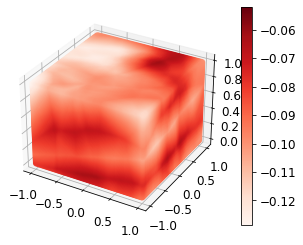

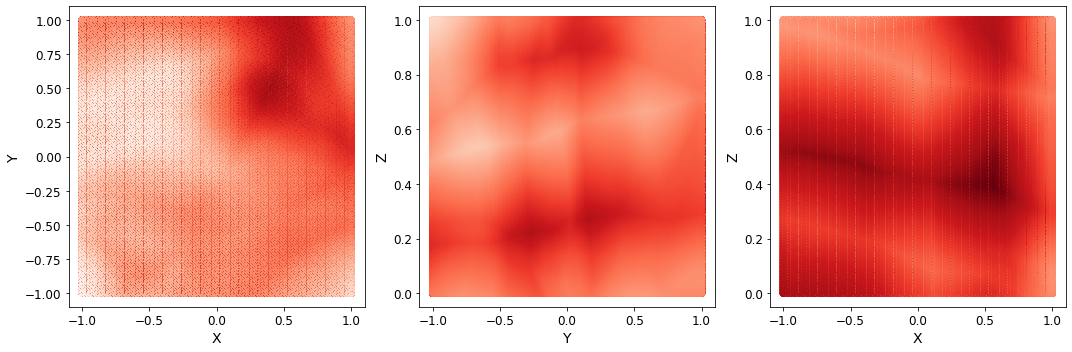

In [27]:
x_num = 100
y_num = 100
z_num = 100
        
x = np.linspace(start=-1, stop=1, num=x_num)
y = np.linspace(start=-1, stop=1, num=y_num)
z = np.linspace(start= 0, stop=1, num=z_num)
        
xyz = np.zeros((x_num*y_num*z_num, 3))
for i in range(x_num):
    for j in range(y_num):
        for k in range(z_num):
            xyz[i*x_num*y_num+j*z_num+k][0] = x[i]
            xyz[i*x_num*y_num+j*z_num+k][1] = y[j]
            xyz[i*x_num*y_num+j*z_num+k][2] = z[k]
                
colour = critic(xyz)

ax = plt.subplot(projection='3d')
p = ax.scatter(xyz[:,0] , xyz[:,1], xyz[:,2], c=colour, cmap='Reds')
plt.colorbar(p)
plt.savefig('GANS/Result/'+'countour_mesh_v'+str(k)+'_epochs'+str(epochs)+'.png')
plt.show()


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
#axes[0].scatter(X_train[:,0],X_train[:,1])
axes[0].scatter(xyz[:,0] , xyz[:,1] , c=colour, cmap='Reds')
axes[0].set_xlabel("X")
axes[0].set_ylabel("Y")
    

#axes[1].scatter(X_train[:,1],y_train)
axes[1].scatter(xyz[:,1],xyz[:,2] , c=colour, cmap='Reds')
axes[1].set_xlabel("Y")
axes[1].set_ylabel("Z")
    

#axes[2].scatter(X_train[:,0],y_train)
axes[2].scatter(xyz[:,0], xyz[:,2] , c=colour, cmap='Reds')
axes[2].set_xlabel("X")
axes[2].set_ylabel("Z")
    
plt.tight_layout()
plt.savefig('GANS/Result/'+'countour_mesh_slice_v'+str(k)+'_epochs'+str(epochs)+'.png')
plt.show()

In [ ]:
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1])
    axes[0].scatter(predicted_values[:,0],predicted_values[:,1],c='green')
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train)
    axes[1].scatter(predicted_values[:,1],predicted_values[:,2], c='green')
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train)
    axes[2].scatter(predicted_values[:,0],predicted_values[:,2], c='green')
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(predicted_values[:,0]>=-0.8-0.05,predicted_values[:,0]<=-0.8+0.05),predicted_values[:,1],None)
    axes[0].scatter(ac,y_train, c='black')
    axes[0].scatter(ad,predicted_values[:,2], c='green')
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(predicted_values[:,0]>=0.0-0.05,predicted_values[:,0]<=0.0+0.05),predicted_values[:,1],None)
    axes[1].scatter(ae,y_train, c='black')
    axes[1].scatter(af,predicted_values[:,2], c='green')
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(predicted_values[:,0]>=0.8-0.05,predicted_values[:,0]<=0.8+0.05),predicted_values[:,1],None)
    axes[2].scatter(ag,y_train, c='black')
    axes[2].scatter(ah,predicted_values[:,2], c='green')
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(predicted_values[:,1]>=0.2-0.05,predicted_values[:,1]<=0.2+0.05),predicted_values[:,0],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,predicted_values[:,2], c='green')
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(predicted_values[:,1]>=0.5-0.05,predicted_values[:,1]<=0.5+0.05),predicted_values[:,0],None)
    axes[1].scatter(ae,y_train, c='gray')
    axes[1].scatter(af,predicted_values[:,2], c='green')
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(predicted_values[:,1]>=0.8-0.05,predicted_values[:,1]<=0.8+0.05),predicted_values[:,0],None)
    axes[2].scatter(ag,y_train, c='gray')
    axes[2].scatter(ah,predicted_values[:,2], c='green')
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()

### Applying the prediction function

## Fixed Input